# Question 1
Definire i concetti di stazionarietà e integrazione e fornire le condizioni per le quali un processo AR(2) è integrato di ordine 1.

## Stationarity and Integration in Time Series

## Stationarity

A stochastic process $\{X_t\}$ is said to be **weakly stationary** (or covariance stationary) if it satisfies the following conditions:

1. The expected value is constant and independent of time:
   $$E[X_t] = \mu < \infty, \quad \forall t$$

2. The variance is finite and independent of time:
   $$Var(X_t) = \sigma^2 < \infty, \quad \forall t$$

3. The autocovariance function depends only on the time lag h and not on time t:
   $$Cov(X_t, X_{t+h}) = \gamma(h), \quad \forall t, h$$

## Integration

A time series is said to be **integrated of order d**, denoted as $I(d)$, if it needs to be differenced d times to become stationary. More formally:

- If $Y_t \sim I(d)$, then $\Delta^d Y_t$ is stationary
- Where $\Delta$ is the difference operator: $\Delta Y_t = Y_t - Y_{t-1}$
- And $\Delta^d$ represents applying the difference operator d times

## AR(2) Process and Integration

An AR(2) process is defined as:

$$Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + \varepsilon_t$$

where $\varepsilon_t$ is white noise.

For an AR(2) process to be integrated of order 1, $I(1)$, it must satisfy two conditions:

1. The characteristic equation $1 - \phi_1z - \phi_2z^2 = 0$ must have exactly one unit root $(z = 1)$
2. The other root must lie outside the unit circle

This translates to the following conditions on the parameters:

1. $\phi_1 + \phi_2 = 1$ (ensures one unit root)
2. $|\phi_2| < 1$ (ensures the other root is outside the unit circle)

### Example

Consider the AR(2) process:
$$Y_t = 1.5Y_{t-1} - 0.5Y_{t-2} + \varepsilon_t$$

Here, $\phi_1 = 1.5$ and $\phi_2 = -0.5$

1. Check if $\phi_1 + \phi_2 = 1$:
   $1.5 + (-0.5) = 1$ ✓

2. Check if $|\phi_2| < 1$:
   $|-0.5| = 0.5 < 1$ ✓

Therefore, this AR(2) process is integrated of order 1. This means that while $Y_t$ is non-stationary, its first difference $\Delta Y_t$ will be stationary.

The characteristic equation is:
$$1 - 1.5z + 0.5z^2 = 0.5(z - 1)(z - 2) = 0$$

As we can see, one root is $z = 1$ (the unit root) and the other is $z = 2$ (outside the unit circle), confirming our analysis.

## The Unit Root Concept

A "unit root" is a characteristic of a time series process where a root of the characteristic equation equals 1 (unity). The characteristic equation is obtained by:

1. Writing the AR process in lag operator form: $(1 - \phi_1L - \phi_2L^2)Y_t = \varepsilon_t$
2. Replacing L with z: $1 - \phi_1z - \phi_2z^2 = 0$

The "unit circle" in the complex plane is the circle with radius 1 centered at the origin. A root lying:
- On the unit circle $(|z| = 1)$ → Process is non-stationary
- Outside the unit circle $(|z| > 1)$ → Process is stationary
- Inside the unit circle $(|z| < 1)$ → Process is explosive

## Visual Representation

For an AR(2) process, we can visualize the roots in the complex plane:
```
                    Im
                     ↑
            Unit Circle → |z| = 1
                     |
          -1 ←------+-----→ 1   Re
                     |
                     ↓
```

## Implications for Different AR Processes

### AR(1) Process
For an AR(1) process $Y_t = \phi Y_{t-1} + \varepsilon_t$:
- Characteristic equation: $1 - \phi z = 0$
- Single root: $z = \frac{1}{\phi}$
- To be I(1): must have exactly $\phi = 1$

### AR(2) Process
For an AR(2) process $Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + \varepsilon_t$:
- Characteristic equation: $1 - \phi_1z - \phi_2z^2 = 0$
- Two roots: both can be real or complex conjugates
- To be I(1): one root must be 1, other outside unit circle

### AR(3) Process
For an AR(3) process $Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + \phi_3Y_{t-3} + \varepsilon_t$:
- Characteristic equation: $1 - \phi_1z - \phi_2z^2 - \phi_3z^3 = 0$
- Three roots: can be all real or one real and two complex conjugates
- To be I(1): one root must be 1, other two outside unit circle
- Parameter conditions: $\phi_1 + \phi_2 + \phi_3 = 1$ and other stability conditions

## Behavior Examples

1. **All roots outside unit circle** (Stationary):
   - Series fluctuates around mean
   - Shocks have temporary effects
   - Example: AR(1) with $\phi = 0.5$

2. **One unit root** (I(1)):
   - Series wanders without fixed mean
   - Shocks have permanent effects
   - Example: Random Walk $Y_t = Y_{t-1} + \varepsilon_t$

3. **Root inside unit circle** (Explosive):
   - Series diverges exponentially
   - Shocks have amplifying effects
   - Example: AR(1) with $\phi = 1.2$

## Implications for Time Series Analysis

1. **Stationarity Testing**:
   - Unit root tests (like ADF, KPSS) check for presence of unit roots
   - Critical for choosing appropriate modeling strategy

2. **Cointegration**:
   - When two I(1) series share a common unit root
   - Their linear combination might be stationary

3. **Forecasting**:
   - Unit roots affect forecast uncertainty
   - Confidence intervals grow wider for I(1) processes

4. **Model Selection**:
   - I(1) series need differencing or ARIMA modeling
   - Stationary series can use ARMA modeling

# Question 2

Quale processo della famiglia ARMA ha il seguente correlogramma.

## Identifying ARMA Processes from Correlograms

## Theoretical Patterns in ACF and PACF

The identification of ARMA processes relies on the analysis of two key functions:

1. **Autocorrelation Function (ACF)** $\rho(k)$:
   $$\rho(k) = \frac{\gamma(k)}{\gamma(0)} = \frac{Cov(Y_t, Y_{t-k})}{Var(Y_t)}$$

2. **Partial Autocorrelation Function (PACF)** $\alpha(k)$:
   Measures correlation between $Y_t$ and $Y_{t-k}$ after removing the linear effects of $Y_{t-1}, ..., Y_{t-k+1}$

## Identifying Patterns

### 1. AR(p) Processes

For an AR(p) process:
- ACF: Tails off gradually (exponential decay or damped sinusoidal)
- PACF: Cuts off after lag p
- Example AR(1): $Y_t = 0.7Y_{t-1} + \varepsilon_t$
  * ACF: $\rho(k) = 0.7^k$
  * PACF: $\alpha(1) = 0.7$, $\alpha(k) = 0$ for $k > 1$

### 2. MA(q) Processes

For an MA(q) process:
- ACF: Cuts off after lag q
- PACF: Tails off gradually
- Example MA(1): $Y_t = \varepsilon_t + 0.7\varepsilon_{t-1}$
  * ACF: $\rho(1) = \frac{0.7}{1+0.7^2}$, $\rho(k) = 0$ for $k > 1$
  * PACF: Decays exponentially

### 3. ARMA(p,q) Processes

For an ARMA(p,q) process:
- ACF: Tails off after lag q
- PACF: Tails off after lag p
- More complex patterns that combine AR and MA characteristics

## Common Correlogram Patterns

1. **White Noise**
   - ACF: All zero except at lag 0
   - PACF: All zero except at lag 0

2. **AR(1)**
   - ACF: Exponential decay
   - PACF: Single spike at lag 1

3. **AR(2)**
   - ACF: Damped exponential or sinusoidal decay
   - PACF: Two spikes, zero afterward

4. **MA(1)**
   - ACF: Single spike at lag 1
   - PACF: Exponential decay

5. **MA(2)**
   - ACF: Two spikes, zero afterward
   - PACF: Damped exponential decay

## Identification Steps

1. **Examine ACF**:
   - If cuts off: Suggests MA component
   - If decays: Suggests AR component
   - Count significant lags before cutoff

2. **Examine PACF**:
   - If cuts off: Suggests AR component
   - If decays: Suggests MA component
   - Count significant lags before cutoff

3. **Combine Information**:
   - If both tail off: ARMA process
   - If one cuts off: Pure AR or MA
   - Note the lags where patterns change

## Important Considerations

1. **Sample Size Effects**:
   - Larger samples give clearer patterns
   - Use confidence bands (typically ±2/√n)

2. **Stationarity**:
   - Patterns only valid for stationary series
   - May need differencing first

3. **Seasonality**:
   - Look for spikes at seasonal lags
   - May need seasonal differencing

4. **Model Validation**:
   - Check residual correlograms
   - Should resemble white noise

# Question 3

Le matrici T e Q dei due tipi di stagionalità (ogni sette giorni).

## T and Q Matrices for Weekly Seasonality (s=7)

## 1. Dummy Variables Seasonality

For weekly seasonality using dummy variables, we need 6 state variables (the 7th is determined by the constraint that they sum to zero).

### Transition Matrix T
For s = 7, the transition matrix T is a 6×6 matrix:

$$
T = \begin{bmatrix} 
-1 & -1 & -1 & -1 & -1 & -1 \\
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0
\end{bmatrix}
$$

### Disturbance Variance Matrix Q
The Q matrix is a 6×6 matrix with only one non-zero element:

$$
Q = \begin{bmatrix}
\sigma_{\omega}^2 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

## 2. Trigonometric Seasonality

For weekly seasonality using trigonometric form, we need 3 harmonics (since ⌊7/2⌋ = 3).

### Transition Matrix T
For s = 7, the transition matrix T is a 6×6 block diagonal matrix:

$$
T = \begin{bmatrix}
\begin{bmatrix}
\cos(\lambda_1) & \sin(\lambda_1) \\
-\sin(\lambda_1) & \cos(\lambda_1)
\end{bmatrix} & 0 & 0 \\
0 & \begin{bmatrix}
\cos(\lambda_2) & \sin(\lambda_2) \\
-\sin(\lambda_2) & \cos(\lambda_2)
\end{bmatrix} & 0 \\
0 & 0 & \begin{bmatrix}
\cos(\lambda_3) & \sin(\lambda_3) \\
-\sin(\lambda_3) & \cos(\lambda_3)
\end{bmatrix}
\end{bmatrix}
$$

where $\lambda_j = \frac{2\pi j}{7}$ for j = 1, 2, 3

### Disturbance Variance Matrix Q
The Q matrix is a 6×6 diagonal matrix:

$$
Q = \begin{bmatrix}
\sigma_{\omega}^2 & 0 & 0 & 0 & 0 & 0 \\
0 & \sigma_{\omega}^2 & 0 & 0 & 0 & 0 \\
0 & 0 & \sigma_{\omega}^2 & 0 & 0 & 0 \\
0 & 0 & 0 & \sigma_{\omega}^2 & 0 & 0 \\
0 & 0 & 0 & 0 & \sigma_{\omega}^2 & 0 \\
0 & 0 & 0 & 0 & 0 & \sigma_{\omega}^2
\end{bmatrix}
$$

## Properties and Interpretation

### Dummy Variables Form:
- First row of T matrix ensures sum-to-zero constraint
- Subsequent rows shift the seasonal effects
- Single variance parameter in Q controls evolution
- State vector directly represents seasonal effects

### Trigonometric Form:
- Block diagonal structure in T represents harmonics
- Each 2×2 block is a rotation matrix
- Equal variances in Q for all components
- State vector represents amplitudes of harmonics

## Key Differences:
1. **Size**: Both are 6×6 but structured differently
2. **Evolution**: 
   - Dummy: Direct shifts with one shock
   - Trigonometric: Smooth rotation with multiple shocks
3. **Interpretation**:
   - Dummy: Direct seasonal effects
   - Trigonometric: Frequency components
4. **Smoothness**:
   - Dummy: Can have sharp changes
   - Trigonometric: Naturally smoother transitions

# Question 4:

Le matrici della forma state space di un modello UCM con le seguenti componenti:

- random walk,
- ciclo stocastico,
- regressione su xt,
- rumore di osservazione.

## State Space Matrices for UCM Model

## Model Components

The model contains:
1. Random walk (level component)
2. Stochastic cycle
3. Regression on $x_t$
4. Observation noise

The model can be written as:

$$y_t = \mu_t + \psi_t + \beta x_t + \varepsilon_t$$

where:
- $\mu_t$ is the random walk
- $\psi_t$ is the stochastic cycle
- $\beta x_t$ is the regression term
- $\varepsilon_t$ is the observation noise

## State Space Representation

### State Vector
The state vector $\alpha_t$ contains:
- Random walk level ($\mu_t$)
- Cycle ($\psi_t$) and auxiliary cycle component ($\psi_t^*$)
- Regression coefficient ($\beta_t$)

$$\alpha_t = \begin{bmatrix} 
\mu_t \\
\psi_t \\
\psi_t^* \\
\beta_t
\end{bmatrix}$$

### Transition Matrix T
$$T = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & \rho\cos(\lambda) & \rho\sin(\lambda) & 0 \\
0 & -\rho\sin(\lambda) & \rho\cos(\lambda) & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}$$

where:
- $\rho$ is the damping factor of the cycle $(0 < \rho < 1)$
- $\lambda$ is the cycle frequency $(0 < \lambda < \pi)$

### Observation Matrix Z
$$Z = \begin{bmatrix} 1 & 1 & 0 & x_t \end{bmatrix}$$

Note that $x_t$ enters in the observation matrix as it multiplies $\beta_t$

### System Disturbance Matrix R
$$R = I_4$$ 
(4×4 identity matrix)

### System Disturbance Covariance Matrix Q
$$Q = \begin{bmatrix}
\sigma_\eta^2 & 0 & 0 & 0 \\
0 & \sigma_\kappa^2 & 0 & 0 \\
0 & 0 & \sigma_\kappa^2 & 0 \\
0 & 0 & 0 & \sigma_\beta^2
\end{bmatrix}$$

where:
- $\sigma_\eta^2$ is the variance of random walk innovations
- $\sigma_\kappa^2$ is the variance of cycle disturbances
- $\sigma_\beta^2$ is the variance of regression coefficient innovations

### Observation Disturbance Variance H
$$H = \sigma_\varepsilon^2$$

## Properties and Interpretation

1. **Random Walk Component**:
   - Single state element ($\mu_t$)
   - Unit coefficient in T matrix
   - Innovation variance $\sigma_\eta^2$

2. **Cycle Component**:
   - Two state elements ($\psi_t, \psi_t^*$)
   - 2×2 rotation matrix in T
   - Equal variances $\sigma_\kappa^2$ for both components

3. **Regression Component**:
   - Time-varying coefficient $\beta_t$
   - Random walk evolution
   - Innovation variance $\sigma_\beta^2$

4. **Complete System**:
   - State dimension: 4
   - $x_t$ enters via Z matrix
   - All disturbances are uncorrelated

## State Evolution Equations

1. Random walk:
   $$\mu_t = \mu_{t-1} + \eta_t$$

2. Stochastic cycle:
   $$\begin{bmatrix} \psi_t \\ \psi_t^* \end{bmatrix} = \rho\begin{bmatrix} \cos(\lambda) & \sin(\lambda) \\ -\sin(\lambda) & \cos(\lambda) \end{bmatrix} \begin{bmatrix} \psi_{t-1} \\ \psi_{t-1}^* \end{bmatrix} + \begin{bmatrix} \kappa_t \\ \kappa_t^* \end{bmatrix}$$

3. Regression coefficient:
   $$\beta_t = \beta_{t-1} + \zeta_t$$

## Observation Equation
$$y_t = \begin{bmatrix} 1 & 1 & 0 & x_t \end{bmatrix} \begin{bmatrix} \mu_t \\ \psi_t \\ \psi_t^* \\ \beta_t \end{bmatrix} + \varepsilon_t$$

## Understanding the Stochastic Cycle

## 1. Single Form vs Seasonality

Unlike seasonality, the stochastic cycle comes in only one form. This is because the cycle is inherently defined using trigonometric functions (sine and cosine). The reason is fundamental:

- **Seasonality** models a pattern that repeats at fixed, known intervals (like days of the week). This can be done either by directly modeling each period's effect (dummy approach) or by using trigonometric functions.

- **Cycle** models a smooth, wave-like pattern where the period itself might vary over time. It can only be effectively modeled using trigonometric functions.

## 2. The Role of ψ and ψ*

The stochastic cycle uses two components (ψ_t and ψ*_t) to create a flexible cyclical pattern. Here's why:

### Basic Cycle Evolution
```
[ψ_t   ]  =  ρ[cos(λ)  sin(λ) ] [ψ_{t-1}  ]  +  [κ_t  ]
[ψ*_t  ]     [-sin(λ)  cos(λ) ] [ψ*_{t-1} ]     [κ*_t ]
```

where:
- λ is the frequency (determines cycle length)
- ρ is the damping factor (0 < ρ ≤ 1)
- κ_t and κ*_t are independent disturbances

### Interpretation:

1. **ψ_t (Primary Component)**:
   - This is the actual cycle component that enters the observation equation
   - Represents the current position in the cycle

2. **ψ*_t (Auxiliary Component)**:
   - Doesn't enter the observation equation directly
   - Helps create the circular motion of the cycle
   - Acts like a "memory" of where the cycle is heading

Together, they create a flexible rotating movement in a 2-dimensional space where:
- ψ_t represents the x-coordinate
- ψ*_t represents the y-coordinate

## Why Two Components are Necessary

The two components are needed because:

1. **Single Dimension Limitation**:
   - With just one component, you could only move back and forth along a line
   - You couldn't capture the smooth, circular nature of cycles

2. **Phase Information**:
   - ψ*_t stores information about the phase of the cycle
   - Helps determine whether the cycle is increasing or decreasing

3. **Smooth Transitions**:
   - The interaction between ψ_t and ψ*_t creates smooth transitions
   - Prevents sudden jumps that would occur with a single component

### Key Parameters:

1. **Frequency (λ)**:
   - Controls how fast the cycle completes one rotation
   - Period = 2π/λ
   - Fixed parameter (estimated from data)

2. **Damping Factor (ρ)**:
   - Controls how quickly the cycle dies out
   - ρ = 1: persistent cycle
   - ρ < 1: dying cycle
   - Also fixed parameter

3. **Disturbances (κ_t, κ*_t)**:
   - Allow the cycle to evolve stochastically
   - Make each cycle different from the last
   - Usually assumed to have equal variances

# Question 5:
Come si costruisce la funzione di verosimiglianza di un modello Gaussiano in forma state-space?

## Likelihood Function Construction for Gaussian State Space Models

## 1. State Space Model Structure

Consider a state space model in its general form:

**Observation equation:**
$$y_t = Z_t\alpha_t + d_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, H_t)$$

**State equation:**
$$\alpha_t = T_t\alpha_{t-1} + c_t + R_t\eta_t, \quad \eta_t \sim N(0, Q_t)$$

## 2. Likelihood Function Components

The log-likelihood function is built from the prediction errors (innovations):

$$\ell(\theta) = -\frac{1}{2}\sum_{t=1}^n \left[ k\log(2\pi) + \log|F_t| + v_t'F_t^{-1}v_t \right]$$

where:
- $\theta$ is the vector of parameters to be estimated
- $k$ is the dimension of the observation vector $y_t$
- $v_t$ is the innovation vector
- $F_t$ is the variance matrix of the innovations
- $n$ is the sample size

## 3. Construction Steps

### Step 1: Initialize
- Set initial state: $a_0 = E(\alpha_0)$
- Set initial variance: $P_0 = Var(\alpha_0)$

### Step 2: Kalman Filter Recursions
For t = 1 to n:

1. **Prediction step:**
   $$a_{t|t-1} = T_ta_{t-1} + c_t$$
   $$P_{t|t-1} = T_tP_{t-1}T_t' + R_tQ_tR_t'$$

2. **Innovation calculations:**
   $$v_t = y_t - Z_ta_{t|t-1} - d_t$$
   $$F_t = Z_tP_{t|t-1}Z_t' + H_t$$

3. **Update step:**
   $$a_t = a_{t|t-1} + P_{t|t-1}Z_t'F_t^{-1}v_t$$
   $$P_t = P_{t|t-1} - P_{t|t-1}Z_t'F_t^{-1}Z_tP_{t|t-1}$$

### Step 3: Accumulate Log-Likelihood
For each t, add to the log-likelihood:
$$\ell_t = -\frac{1}{2}[k\log(2\pi) + \log|F_t| + v_t'F_t^{-1}v_t]$$#

## 4. Practical Implementation

1. **Initialization Approaches:**
   - For stationary components: use unconditional distribution
   - For non-stationary components: use diffuse initialization

2. **Numerical Considerations:**
   - Use log-sum to prevent numerical overflow
   - Handle missing values by skipping their contribution
   - Check for positive definiteness of $F_t$

3. **Parameter Constraints:**
   - Ensure variance matrices remain positive definite
   - Maintain stationarity conditions where required
   - Handle boundary conditions appropriately

## 5. Special Cases

### Diffuse Initialization
When some states have infinite variance:
1. Skip likelihood contribution for first d observations
2. Use modified likelihood for subsequent observations

### Missing Observations
When $y_t$ is partially missing:
1. Remove missing elements from observation equation
2. Adjust dimensions of $Z_t$ and $H_t$ accordingly

### Time-Invariant Systems
When matrices are constant:
1. Simplified storage requirements
2. Potential for computational optimizations

## 6. Maximum Likelihood Estimation

The likelihood function is maximized numerically:

1. **Optimization Methods:**
   - Quasi-Newton methods (BFGS)
   - Simplex algorithm (Nelder-Mead)
   - Grid search for initial values

2. **Parameter Transformations:**
   - Log transform for variances
   - Logit transform for correlations
   - Ensure parameter constraints

3. **Standard Errors:**
   Obtained from numerical second derivatives:
   $$Var(\hat{\theta}) \approx \left[-\frac{\partial^2\ell(\theta)}{\partial\theta\partial\theta'}\right]^{-1}_{\theta=\hat{\theta}}$$

## 7. Diagnostic Checks

After maximizing the likelihood:

1. Check standardized innovations for:
   - Serial correlation
   - Normality
   - Homoscedasticity

2. Check parameter significance using:
   - t-statistics
   - Likelihood ratio tests

## Answer2

## Construction of the Likelihood Function for Gaussian State-Space Models

The construction of the likelihood function for a Gaussian state-space model relies on key properties of the Kalman filter. Let's understand this construction systematically.

A state-space model in its general form consists of two equations:

1. Measurement equation:
   $$y_t = Z_t\alpha_t + d_t + \epsilon_t$$

2. State equation:
   $$\alpha_t = T_t\alpha_{t-1} + c_t + R_t\eta_t$$

where:
- $y_t$ is the observation vector
- $\alpha_t$ is the state vector
- $\epsilon_t$ and $\eta_t$ are Gaussian white noise processes
- $Z_t$, $T_t$, $R_t$ are system matrices
- $d_t$, $c_t$ are deterministic components

The likelihood function is constructed using the prediction error decomposition:

$$L(y_1,...,y_n;\theta) = p(y_1|\theta)\prod_{t=2}^n p(y_t|Y_{t-1};\theta)$$

where $Y_{t-1} = \{y_1,...,y_{t-1}\}$ and $\theta$ represents all unknown parameters.

Due to the Gaussian nature of the model, the conditional distributions are normal:

$$y_t|Y_{t-1} \sim N(Z_ta_{t|t-1} + d_t, F_t)$$

where:
- $a_{t|t-1}$ is the predicted state
- $F_t = Z_tP_{t|t-1}Z_t' + H_t$ is the prediction error variance
- $P_{t|t-1}$ is the state prediction error variance

The log-likelihood function is therefore:

$$\log L(\theta) = -\frac{1}{2}\sum_{t=1}^n \left\{ k\log(2\pi) + \log |F_t| + v_t'F_t^{-1}v_t \right\}$$

where:
- $v_t = y_t - (Z_ta_{t|t-1} + d_t)$ are the innovations
- $k$ is the dimension of the observation vector
- $|F_t|$ denotes the determinant of $F_t$

The quantities $v_t$ and $F_t$ are computed recursively using the Kalman filter. The maximum likelihood estimates are obtained by maximizing this log-likelihood function with respect to $\theta$, typically using numerical optimization methods.

This construction has several important properties:
1. It naturally accounts for missing observations
2. It handles both stationary and non-stationary components
3. It provides a basis for model comparison through likelihood ratio tests and information criteria

## Understanding Likelihood in State Space Models: A Simple Guide

## The Basic Idea

Imagine you're tracking the position of a moving object, but you can only see it through a foggy window (noisy observations). You want to:
1. Know where the object really is (state estimation)
2. Know how good your tracking system is (likelihood)

## What is the Kalman Filter?

The Kalman filter is like a smart prediction system that:
1. Makes a guess about where the object will be (prediction)
2. Looks at the actual observation
3. Updates its guess based on how wrong it was (updating)
4. Learns how much to trust its predictions vs observations

Think of it like GPS navigation:
- Your phone predicts where you'll be based on your speed and direction
- It gets actual GPS readings
- It combines both pieces of information to give you your best estimated position

## How Does Likelihood Come Into Play?

The likelihood tells us "how likely" our model is to produce the data we see. It's built by:

1. **Making Predictions**
   - Using our model to predict the next observation
   - Like guessing where a ball will land based on its trajectory

2. **Comparing to Reality**
   - Seeing how far off our predictions were
   - The smaller the errors, the better our model

3. **Building the Score (Likelihood)**
   - Good predictions (small errors) → Higher likelihood
   - Bad predictions (large errors) → Lower likelihood

## Simple Example

Let's say we're tracking temperature:

1. **State Space Model Components:**
   - True temperature (state we can't directly observe)
   - Thermometer reading (noisy observation)
   - How temperature typically evolves
   - How noisy our thermometer is

2. **For Each New Reading:**
   - Predict temperature based on previous information
   - Take new thermometer reading
   - Compare prediction to reading
   - Update our understanding
   - Add to our likelihood score

3. **Final Likelihood:**
   - Combines all these prediction errors
   - Tells us how well our model fits the data
   - Helps us choose the best model parameters

## Understanding Kalman Filter Estimation

## Basic Concept

The Kalman filter is like a "smart averaging" system that combines:
1. What we expect based on our model
2. What we actually observe
3. How much we trust each piece of information

## Simple Example: Tracking a Car's Position

Imagine tracking a car's position with GPS. At each moment:

### 1. Prediction Step
We predict where the car should be based on:
- Last known position
- Speed
- Direction

$$\underbrace{\hat{x}_{t|t-1}}_{\text{prediction}} = \underbrace{\hat{x}_{t-1}}_{\text{last position}} + \underbrace{v\Delta t}_{\text{speed × time}}$$

### 2. Measurement Step
We get a GPS reading (with some error):

$$\underbrace{z_t}_{\text{GPS reading}} = \underbrace{x_t}_{\text{true position}} + \underbrace{\varepsilon_t}_{\text{measurement noise}}$$

### 3. Update Step
We combine our prediction with the GPS reading:

$$\underbrace{\hat{x}_t}_{\text{final estimate}} = \underbrace{\hat{x}_{t|t-1}}_{\text{prediction}} + \underbrace{K_t}_{\text{Kalman gain}} (\underbrace{z_t - \hat{x}_{t|t-1}}_{\text{measurement error}})$$

The Kalman gain $K_t$ is like a "trust factor" that decides how much to trust:
- Our prediction vs. GPS reading
- Higher $K_t$ → Trust GPS more
- Lower $K_t$ → Trust prediction more

## Key Features

1. **Adaptive Trust**:
   - If GPS is usually accurate → Trust it more
   - If car moves predictably → Trust predictions more
   - Automatically adjusts based on performance

2. **Error Handling**:
   - Accounts for both prediction and measurement errors
   - More uncertain → Less trust
   - More precise → More trust

3. **Memory**:
   - Maintains running estimates
   - Uses all past information efficiently
   - Updates beliefs smoothly

## Why It Works

The Kalman filter is optimal because it:
1. Minimizes estimation errors
2. Accounts for all known uncertainties
3. Updates estimates efficiently
4. Adapts to changing conditions

# Question 6:

Condizioni di stazionarietà di un processo ARMA. Il processo AR(2) yt = 1.5yt−1 − 0.5yt−2 + εt è stazionario?

## ARMA Process Stationarity

## Understanding Stationarity

Let's start with what stationarity means in practical terms. A process is stationary if its statistical properties don't change over time. This means:

1. Constant mean: $E[Y_t] = \mu$ (same for all t)
2. Constant variance: $Var(Y_t) = \sigma^2$ (same for all t)
3. Covariance depends only on time difference: $Cov(Y_t, Y_{t+h}) = \gamma(h)$

## Stationarity Conditions for AR Processes

For an AR(p) process:
$$Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + ... + \phi_pY_{t-p} + \varepsilon_t$$

The stationarity condition involves the characteristic equation:
$$1 - \phi_1z - \phi_2z^2 - ... - \phi_pz^p = 0$$

The process is stationary if and only if all roots of this equation lie outside the unit circle (have modulus greater than 1).

## For Our Specific AR(2) Process

Let's analyze: $y_t = 1.5y_{t-1} - 0.5y_{t-2} + \varepsilon_t$

Step 1: Write the characteristic equation
- Original equation: $y_t = 1.5y_{t-1} - 0.5y_{t-2} + \varepsilon_t$
- Rearrange: $y_t - 1.5y_{t-1} + 0.5y_{t-2} = \varepsilon_t$
- Characteristic equation: $1 - 1.5z + 0.5z^2 = 0$

Step 2: Find the roots
- This is a quadratic equation: $0.5z^2 - 1.5z + 1 = 0$
- Using the quadratic formula: $z = \frac{1.5 \pm \sqrt{2.25 - 2}}{1}$
- $z = \frac{1.5 \pm \sqrt{0.25}}{1}$
- $z = \frac{1.5 \pm 0.5}{1}$
- Roots are: $z_1 = 2$ and $z_2 = 1$

Step 3: Check stationarity
- One root is $z_1 = 2$ (outside unit circle)
- Other root is $z_2 = 1$ (exactly on unit circle)
- Since we have a root on the unit circle, this process is NOT stationary

## Visual Explanation

Consider what this means:
1. Having a root on the unit circle means the process has "infinite memory"
2. The process won't "forget" past shocks
3. This creates persistent effects that prevent mean reversion
4. Therefore, the process can wander without returning to any fixed mean

## Why This Matters

A non-stationary process like this one:
1. Won't have a constant mean
2. Won't have a constant variance
3. Will show persistent effects from shocks
4. May need differencing to become stationary

## Alternative Form: Factored Representation

We can write our characteristic equation in factored form:
$$(1 - \frac{1}{2}z)(1 - z) = 0$$

This clearly shows:
1. One root at $z = 2$ (stationary component)
2. One root at $z = 1$ (unit root, non-stationary component)

## Conclusion

This AR(2) process is not stationary because:
1. It has a unit root $(z = 1)$
2. It would need first differencing to become stationary
3. It is actually an integrated process of order 1, or I(1)

# Question 7: ---

# Question 8:

Genesi e proprietà del ciclo stocastico stazionario.

## Genesis and Properties of the Stationary Stochastic Cycle

The stochastic cycle emerges from the deterministic cycle through a process of "stochasticization". Let's understand this step by step:

## 1. Starting from the Deterministic Cycle

A deterministic cycle can be represented as a sinusoidal function:

$$f(t) = R \cos(\phi + \lambda t)$$

where:
- $R$ is the amplitude (the cycle oscillates between $+R$ and $-R$)
- $\lambda$ is the frequency (number of cycles per unit time)
- $\phi$ is the phase (which shifts the cosine left or right)

This can be rewritten equivalently as:

$$f(t) = A\cos(\lambda t) + B\sin(\lambda t)$$

where:
- $A = R\cos(\phi)$
- $B = -R\sin(\phi)$

## 2. Markov Representation

For discrete time $t$, we can write this in a recursive form:

$$\begin{pmatrix} f_t \\ f^*_t \end{pmatrix} = \begin{pmatrix} \cos\lambda & \sin\lambda \\ -\sin\lambda & \cos\lambda \end{pmatrix} \begin{pmatrix} f_{t-1} \\ f^*_{t-1} \end{pmatrix}$$

where $f^*_t$ is an auxiliary variable that helps generate the cycle.

## 3. Making it Stochastic

To create a stochastic cycle, we add random innovations and a damping factor:

$$\begin{pmatrix} \psi_t \\ \psi^*_t \end{pmatrix} = \rho \begin{pmatrix} \cos\lambda & \sin\lambda \\ -\sin\lambda & \cos\lambda \end{pmatrix} \begin{pmatrix} \psi_{t-1} \\ \psi^*_{t-1} \end{pmatrix} + \begin{pmatrix} \kappa_t \\ \kappa^*_t \end{pmatrix}$$

where:
- $\rho$ is the damping factor $(0 \leq \rho < 1)$
- $\kappa_t, \kappa^*_t$ are white noise disturbances with variance $\sigma^2_\kappa$
- $\psi_t$ is the stochastic cycle
- $\psi^*_t$ is its auxiliary component

## 4. Key Properties

1. **Stationarity**: The cycle is stationary when $0 \leq \rho < 1$. The damping factor $\rho$ ensures that shocks have a diminishing effect over time.

2. **Period**: The period of the cycle is $2\pi/\lambda$. For example, if we want a cycle of 20 time units, we set $\lambda = 2\pi/20$.

3. **Persistence**: $\rho$ controls how long cycles persist. Values close to 1 create long-lasting cycles, while smaller values create more rapidly dampening cycles.

4. **Innovation Variance**: $\sigma^2_\kappa$ determines how much random variation enters the cycle at each time point.

5. **Complex Roots**: The transition matrix has complex eigenvalues $\rho(\cos\lambda \pm i\sin\lambda)$, which create the cyclical behavior.

## 5. Interpretation

The stochastic cycle combines:
- Regular cyclical movement (from the rotation matrix)
- Persistence (through $\rho$)
- Random innovations (via $\kappa_t$)

This makes it ideal for modeling economic cycles, where we observe:
- Regular but not perfectly periodic fluctuations
- Gradual changes in amplitude and phase
- Random shocks that affect the cycle

The stochastic cycle is a key component in structural time series models, often combined with trend and seasonal components to create comprehensive models of economic time series.

## Another answer:
## Understanding the Stationary Stochastic Cycle

Let's start with something familiar and build our way up to understanding stochastic cycles.

### Starting with Simple Cycles

Think about a bicycle wheel spinning. It goes around and around in a regular pattern. In mathematics, we can describe this regular circular motion using a sine or cosine function:

$$\psi_t = A \cos(\lambda t) + B \sin(\lambda t)$$

where:
- $\lambda$ is the frequency (how fast the cycle repeats)
- $A$ and $B$ determine the shape and size of the cycle
- $t$ is time

This is a deterministic cycle - it repeats exactly the same pattern over and over. But real economic cycles aren't so perfect. They have some randomness to them.

### Making the Cycle Random

To make our cycle more realistic, we can write it as a system of two equations:

$$\begin{pmatrix} \psi_t \\ \psi_t^* \end{pmatrix} = \begin{pmatrix} \cos(\lambda) & \sin(\lambda) \\ -\sin(\lambda) & \cos(\lambda) \end{pmatrix} \begin{pmatrix} \psi_{t-1} \\ \psi_{t-1}^* \end{pmatrix} + \begin{pmatrix} \kappa_t \\ \kappa_t^* \end{pmatrix}$$

Here, $\psi_t$ is our main cycle, and $\psi_t^*$ is a helper variable that creates the circular motion. The matrix with sine and cosine functions acts like a rotation, making the cycle go around.

But this cycle would keep going forever at the same size. Real economic cycles tend to fade away over time. So we add one more element - a damping factor $\rho$:

$$\begin{pmatrix} \psi_t \\ \psi_t^* \end{pmatrix} = \rho \begin{pmatrix} \cos(\lambda) & \sin(\lambda) \\ -\sin(\lambda) & \cos(\lambda) \end{pmatrix} \begin{pmatrix} \psi_{t-1} \\ \psi_{t-1}^* \end{pmatrix} + \begin{pmatrix} \kappa_t \\ \kappa_t^* \end{pmatrix}$$

where:
- $0 \leq \rho < 1$ is the damping factor
- $\kappa_t$ and $\kappa_t^*$ are random shocks (white noise)
- $\lambda$ is the frequency (between 0 and $\pi$)

### Properties of the Stochastic Cycle

This cycle has several important properties:

1. **Stationarity**: When $\rho < 1$, the cycle is stationary - it doesn't explode or collapse to zero over time.

2. **Period**: The time to complete one cycle is $2\pi/\lambda$. For example, if $\lambda = \pi/4$, one cycle takes 8 time periods.

3. **Persistence**: The damping factor $\rho$ determines how long cycles persist:
   - If $\rho$ is close to 1, cycles fade very slowly
   - If $\rho$ is close to 0, cycles die out quickly

4. **Random Innovations**: The $\kappa_t$ terms add randomness, making each cycle unique but maintaining the basic cyclical pattern.

### Intuitive Understanding

Think of it like pushing a child on a swing:
- The rotation matrix creates the back-and-forth motion
- $\rho$ is like friction that makes the swinging gradually decrease
- $\kappa_t$ is like giving random pushes to keep the swing going
- $\lambda$ determines how long each swing takes

This combination creates cycles that:
- Look natural and random
- Maintain a basic cyclical pattern
- Gradually fade away unless new shocks hit
- Have a consistent average length or period

This makes it perfect for modeling economic cycles, which often show similar patterns but are never exactly the same.

# Question 9:

Le matrici della forma state space di un modello UCM con le seguenti componenti:
- random walk integrato,
- stagionalità trimestrale a dummy stocastiche,
- rumore di osservazione.

## State Space Matrices for UCM with Integrated Random Walk and Quarterly Seasonality

Let's construct the state space representation for this Unobserved Components Model. The model combines:
1. An integrated random walk for the trend
2. Quarterly stochastic dummy seasonality
3. Observation noise

## State Space Form

A state space model is generally written as:

Observation equation:
$$y_t = Z\alpha_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma^2_\varepsilon)$$

State equation:
$$\alpha_t = T\alpha_t + R\eta_t, \quad \eta_t \sim N(0, Q)$$

## Component Breakdown

### 1. Integrated Random Walk
The integrated random walk is a double-integrated process where:
$$\mu_t = \mu_{t-1} + \beta_{t-1}$$
$$\beta_t = \beta_{t-1} + \zeta_t$$

### 2. Quarterly Seasonal Component
For quarterly data (s=4), the seasonal component requires 3 states due to the zero-sum constraint:
$$\gamma_t = -\gamma_{t-1} - \gamma_{t-2} - \gamma_{t-3} + \omega_t$$

### 3. Complete State Vector
The state vector combines all components:

$$\alpha_t = \begin{pmatrix} \mu_t \\ \beta_t \\ \gamma_t \\ \gamma_{t-1} \\ \gamma_{t-2} \end{pmatrix}$$

## The State Space Matrices

### Transition Matrix T:
$$T = \begin{pmatrix} 
1 & 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & -1 & -1 & -1 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0
\end{pmatrix}$$

### Observation Matrix Z:
$$Z = \begin{pmatrix} 1 & 0 & 1 & 0 & 0 \end{pmatrix}$$

### Selection Matrix R:
$$R = \begin{pmatrix}
0 & 0 & 0 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix}$$

### Disturbance Covariance Matrix Q:
$$Q = \begin{pmatrix}
\sigma^2_\zeta & 0 & 0 \\
0 & \sigma^2_\omega & 0 \\
0 & 0 & 0
\end{pmatrix}$$

## Understanding the Matrices

1. **T matrix**: 
   - The upper 2×2 block handles the integrated random walk
   - The lower 3×3 block manages the seasonal component
   - Zeros elsewhere ensure components evolve independently

2. **Z matrix**:
   - The 1 in first position extracts the trend level
   - The 1 in third position adds the current seasonal
   - Zeros elsewhere exclude other state elements from observation

3. **R and Q matrices**:
   - Together they determine how innovations enter the system
   - Innovations affect the slope ($\zeta_t$) and seasonal ($\omega_t$)
   - The zeros in R and Q ensure some states only transfer values

The observation equation includes additional noise:
$$y_t = Z\alpha_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma^2_\varepsilon)$$

This complete state space formulation allows us to:
- Track the evolution of trend and seasonal components
- Apply the Kalman filter for estimation
- Generate predictions
- Decompose the series into its components

## Understanding Trend Models: Local Linear Trend vs. Integrated Random Walk

Let's break down these concepts carefully to understand their differences and relationships.

## 1. Local Linear Trend (LLT)

The Local Linear Trend is defined by two equations:

$$\mu_t = \mu_{t-1} + \beta_{t-1} + \eta_t \quad \text{(level equation)}$$
$$\beta_t = \beta_{t-1} + \zeta_t \quad \text{(slope equation)}$$

where:
- $\mu_t$ is the level
- $\beta_t$ is the slope
- $\eta_t \sim N(0, \sigma^2_\eta)$ is the level disturbance
- $\zeta_t \sim N(0, \sigma^2_\zeta)$ is the slope disturbance

Key characteristics:
1. Has TWO sources of randomness ($\eta_t$ and $\zeta_t$)
2. The level equation includes both the previous slope and a random shock
3. The slope follows a random walk

## 2. Integrated Random Walk (IRW)

The Integrated Random Walk is a special case of the LLT where $\sigma^2_\eta = 0$:

$$\mu_t = \mu_{t-1} + \beta_{t-1} \quad \text{(level equation)}$$
$$\beta_t = \beta_{t-1} + \zeta_t \quad \text{(slope equation)}$$

Key characteristics:
1. Has only ONE source of randomness ($\zeta_t$)
2. The level equation is deterministic given the previous state
3. The slope follows a random walk
4. It's "integrated" because the level $\mu_t$ is the integral (cumulative sum) of the random walk $\beta_t$

## Key Differences

1. **Number of Disturbances:**
   - LLT: Has both level ($\eta_t$) and slope ($\zeta_t$) disturbances
   - IRW: Has only slope disturbances ($\zeta_t$)

2. **Smoothness:**
   - LLT: Generally less smooth due to level shocks
   - IRW: Smoother because changes only come through the slope

3. **Flexibility:**
   - LLT: More flexible in adapting to sudden changes
   - IRW: Changes must occur gradually through slope adjustments

4. **Path Dependencies:**
   - LLT: Can have immediate jumps in level
   - IRW: All changes must accumulate through the slope

## Why "Integrated"?

The term "integrated" in IRW comes from the fact that:
1. The slope $\beta_t$ is a random walk
2. The level $\mu_t$ is the cumulative sum (integral) of this random walk
3. This makes $\mu_t$ an I(2) process (needs differencing twice to become stationary)

## Choosing Between Models

1. Use LLT when:
   - The series can have sudden level shifts
   - You need more flexibility in the trend
   - The underlying process might have abrupt changes

2. Use IRW when:
   - The trend should be smooth
   - Changes should occur gradually
   - You want to enforce continuity in the trend

The choice often depends on the nature of your data and the type of trend behavior you expect to see.

## Understanding Random Walks vs. Integrated Random Walks

## Simple Random Walk

A Random Walk (RW) is the simplest non-stationary process. It's defined by:

$$y_t = y_{t-1} + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma^2)$$

Key properties:
1. Each step is independent of previous steps
2. The change in position (first difference) is just white noise
3. It's an I(1) process - needs one difference to become stationary
4. The variance grows linearly with time: $Var(y_t) = t\sigma^2$

Think of it like a drunk person walking: each step is random and independent of previous steps.

## Integrated Random Walk

An Integrated Random Walk (IRW) has two layers:

$$\mu_t = \mu_{t-1} + \beta_{t-1} \quad \text{(level)}$$
$$\beta_t = \beta_{t-1} + \zeta_t \quad \text{(slope)}$$

Key properties:
1. The slope follows a Random Walk
2. The level accumulates (integrates) the Random Walk
3. It's an I(2) process - needs two differences to become stationary
4. The variance grows much faster: approximately $t^5/20$ for large $t$
5. Much smoother paths than a Random Walk

Think of it like a car with random accelerations: the speed follows a random walk, and the position accumulates these speed changes.

## Key Differences

1. **Order of Integration:**
   - RW: I(1) - difference once to get white noise
   - IRW: I(2) - need to difference twice

2. **Path Smoothness:**
   - RW: Jagged, can change direction suddenly
   - IRW: Smooth, changes direction gradually

3. **Memory:**
   - RW: No memory of past changes
   - IRW: Changes accumulate through the slope

4. **Variance Growth:**
   - RW: Grows linearly with time
   - IRW: Grows much faster (∝ t⁵)

## Visual Interpretation

In the graphs above:
- The Random Walk shows more jagged movements
- The Integrated Random Walk shows smoother, more persistent trends
- The IRW slope (bottom graph) shows how the rate of change evolves

This is why IRWs are often used for trend modeling - they produce smoother, more natural-looking trends than simple Random Walks.

## ANOTHER REPLY: State Space Form for UCM with Integrated (I(2)) Random Walk

### Understanding the Integrated Random Walk

An integrated random walk is obtained by integrating a random walk. This means:
1. Start with white noise: $\eta_t$
2. Integrate once to get a random walk: $\mu_t^{(1)} = \mu_{t-1}^{(1)} + \eta_t$
3. Integrate again to get integrated random walk: $\mu_t^{(2)} = \mu_{t-1}^{(2)} + \mu_{t-1}^{(1)}$

The state equations for an integrated random walk are:
$$\begin{align*}
\mu_t^{(2)} &= \mu_{t-1}^{(2)} + \mu_{t-1}^{(1)} \\
\mu_t^{(1)} &= \mu_{t-1}^{(1)} + \eta_t
\end{align*}$$

### Complete State Space Form

The state vector needs to include both levels of integration plus seasonal components:

$$\alpha_t = \begin{pmatrix} \mu_t^{(2)} \\ \mu_t^{(1)} \\ \gamma_t \\ \gamma_{t-1} \\ \gamma_{t-2} \end{pmatrix}$$

Measurement equation:
$$y_t = \begin{pmatrix} 1 & 0 & 1 & 0 & 0 \end{pmatrix} \alpha_t + \epsilon_t$$

State equation:
$$\alpha_t = \begin{pmatrix} 
1 & 1 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 & 0 \\ 
0 & 0 & -1 & -1 & -1 \\ 
0 & 0 & 1 & 0 & 0 \\ 
0 & 0 & 0 & 1 & 0 
\end{pmatrix} \alpha_{t-1} + \begin{pmatrix} 
0 \\ 
\eta_t \\ 
\omega_t \\ 
0 \\ 
0 
\end{pmatrix}$$

The disturbance vector has covariance matrix:
$$Q = \begin{pmatrix} 
0 & 0 & 0 & 0 & 0 \\ 
0 & \sigma^2_\eta & 0 & 0 & 0 \\ 
0 & 0 & \sigma^2_\omega & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 
\end{pmatrix}$$

And the observation noise has variance $H = \sigma^2_\epsilon$

### Key Differences from I(1) Model

1. The trend component now represents an I(2) process, requiring two state variables:
   - $\mu_t^{(2)}$ is the actual level (integrated twice)
   - $\mu_t^{(1)}$ is the first difference (integrated once)

2. The transition matrix top-left block is now structured to create double integration:
   - First row adds the first difference to previous level
   - Second row updates the first difference with new innovation

3. The innovation enters at the first difference level ($\mu_t^{(1)}$), not directly into the level equation

4. This structure ensures the trend component needs to be differenced twice to achieve stationarity

# Question 10:

L’inizializzazione del vettore di stato in un modello in forma state space: si considerino i casi di variabili di stato stazionarie e non stazionarie.

## Initialization of the State Vector in State Space Models

The initialization of state space models is a crucial step that determines how we begin our filtering and smoothing procedures. Let's understand how we handle both stationary and non-stationary components.

## General Form of State Space Models

Remember that a state space model has the form:

Observation equation:
$$y_t = Z_t\alpha_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, H_t)$$

State equation:
$$\alpha_t = T_t\alpha_{t-1} + R_t\eta_t, \quad \eta_t \sim N(0, Q_t)$$

To start the Kalman filter, we need initial values:
$$\alpha_0 \sim N(a_0, P_0)$$

## Initialization for Stationary Components

When components are stationary, we can use their unconditional distribution for initialization:

1. **Mean Initialization ($a_0$):**
   The unconditional mean satisfies:
   $$E(\alpha_t) = TE(\alpha_{t-1})$$
   Therefore:
   $$a_0 = (I - T)^{-1}c$$
   where $c$ is the constant term in the state equation.

2. **Variance Initialization ($P_0$):**
   The unconditional variance satisfies:
   $$P_0 = TP_0T' + RQR'$$
   This can be solved as:
   $$vec(P_0) = (I - T \otimes T)^{-1}vec(RQR')$$
   where $\otimes$ denotes the Kronecker product.

For example, for a stationary AR(1) component:
$$\alpha_t = \phi\alpha_{t-1} + \eta_t, \quad |\phi| < 1$$
The initialization would be:
$$a_0 = 0, \quad P_0 = \frac{\sigma^2_\eta}{1-\phi^2}$$

## Initialization for Non-stationary Components

Non-stationary components require different treatment because their unconditional distribution doesn't exist. We have two main approaches:

1. **Diffuse Initialization:**
   For non-stationary components, we use:
   $$P_0 = \kappa I, \quad \kappa \to \infty$$
   This represents complete uncertainty about the initial state.

2. **Exact Diffuse Initialization:**
   We decompose the initial state into:
   $$\alpha_0 = a_0 + A_0\delta$$
   where:
   - $a_0$ is a known vector
   - $A_0$ is a selection matrix
   - $\delta$ is a vector of diffuse elements

For example, for a random walk:
$$\alpha_t = \alpha_{t-1} + \eta_t$$
We would use:
$$a_0 = 0, \quad P_0 = \kappa \quad (\kappa \to \infty)$$

## Mixed Cases

Many models contain both stationary and non-stationary components. In these cases:

1. **Split the State Vector:**
   $$\alpha_t = \begin{pmatrix} \alpha^s_t \\ \alpha^n_t \end{pmatrix}$$
   where:
   - $\alpha^s_t$ contains stationary components
   - $\alpha^n_t$ contains non-stationary components

2. **Initialize Separately:**
   - Use unconditional distribution for $\alpha^s_t$
   - Use diffuse initialization for $\alpha^n_t$

For example, in a local level model with AR(1) seasonal:
- Initialize the level component with diffuse prior
- Initialize the seasonal component using its stationary distribution

## Practical Considerations

1. **Numerical Implementation:**
   - For diffuse initialization, use a large but finite value for $\kappa$ (e.g., $10^7$)
   - Handle potential numerical instability in matrix inversions

2. **Software Implementation:**
   - Most software packages handle initialization automatically
   - May need to specify if components are diffuse or stationary

3. **Diagnostics:**
   - Check sensitivity to initialization choices
   - Monitor convergence of the filter

# Question 11:

Condizioni di stazionarietà di un processo AR(p). Il processo Yt = 1.5Yt−1 − 0.6Yt−1 + εt, εt ∼ WN è stazionario? Perché?

## Stationarity Conditions for AR(p) Processes

## General Theory

An AR(p) process is defined as:

$$Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + ... + \phi_pY_{t-p} + \varepsilon_t$$

where $\varepsilon_t$ is white noise.

### Stationarity Condition

The process is stationary if and only if all roots of the characteristic equation:

$$1 - \phi_1z - \phi_2z^2 - ... - \phi_pz^p = 0$$

lie outside the unit circle (i.e., have modulus greater than 1).

Equivalently, if we define the lag operator polynomial:
$$\phi(L) = 1 - \phi_1L - \phi_2L^2 - ... - \phi_pL^p$$
then all roots of $\phi(z) = 0$ must lie outside the unit circle.

### Special Cases:

1. **AR(1)**: $Y_t = \phi_1Y_{t-1} + \varepsilon_t$
   - Stationary if $|\phi_1| < 1$

2. **AR(2)**: $Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + \varepsilon_t$
   - Must satisfy three conditions:
     1. $\phi_2 + \phi_1 < 1$
     2. $\phi_2 - \phi_1 < 1$
     3. $|\phi_2| < 1$

## Analysis of the Given Process

Let's analyze: $Y_t = 1.5Y_{t-1} - 0.6Y_{t-1} + \varepsilon_t$

1. First, note there seems to be a typo in the equation as $Y_{t-1}$ appears twice.
   We'll assume it should be: $Y_t = 1.5Y_{t-1} - 0.6Y_{t-2} + \varepsilon_t$

2. This is an AR(2) process with:
   - $\phi_1 = 1.5$
   - $\phi_2 = -0.6$

3. Let's check the stationarity conditions:
   - Condition 1: $\phi_2 + \phi_1 < 1$
     - $-0.6 + 1.5 = 0.9 < 1$ ✓
   - Condition 2: $\phi_2 - \phi_1 < 1$
     - $-0.6 - 1.5 = -2.1 < 1$ ✓
   - Condition 3: $|\phi_2| < 1$
     - $|-0.6| = 0.6 < 1$ ✓

4. Alternative method: Find roots of characteristic equation:
   $$1 - 1.5z + 0.6z^2 = 0$$
   
   Using the quadratic formula:
   $$z = \frac{1.5 \pm \sqrt{2.25 - 2.4}}{1.2} = \frac{1.5 \pm \sqrt{-0.15}}{1.2}$$

   The roots are complex with modulus:
   $$|z| = \sqrt{\frac{2.25 + 0.15}{1.44}} = \sqrt{\frac{2.4}{1.44}} \approx 1.29 > 1$$

## Conclusion

Yes, the process is stationary because:
1. All three conditions for AR(2) stationarity are satisfied
2. The roots of the characteristic equation have modulus greater than 1

The complex roots indicate that the process will show cyclical behavior, but since their modulus is greater than 1, these cycles will be stationary rather than explosive.

### Practical Interpretation

A stationary AR(2) process with these coefficients will:
1. Show oscillatory behavior (due to complex roots)
2. Have a tendency to return to its mean value
3. Have finite and constant variance
4. Have autocorrelation function that decays over time

## Analysis of the Original Process (no typo)

## Step 1: Simplify the Equation

The original equation:
$$Y_t = 1.5Y_{t-1} - 0.6Y_{t-1} + \varepsilon_t$$

Can be simplified by combining like terms:
$$Y_t = (1.5 - 0.6)Y_{t-1} + \varepsilon_t$$
$$Y_t = 0.9Y_{t-1} + \varepsilon_t$$

## Step 2: Identify the Process

After simplification, we can see this is actually an AR(1) process with:
- $\phi_1 = 0.9$
- $\varepsilon_t$ is white noise

## Step 3: Check Stationarity Condition

For an AR(1) process, the stationarity condition is simply $|\phi_1| < 1$

In this case:
$$|\phi_1| = |0.9| = 0.9 < 1$$

## Step 4: Alternative Method - Characteristic Equation

The characteristic equation is:
$$1 - 0.9z = 0$$

Solving for z:
$$z = \frac{1}{0.9} \approx 1.11$$

The root lies outside the unit circle (as $1.11 > 1$).

## Conclusion

Yes, the process is stationary because:
1. $|\phi_1| = 0.9 < 1$
2. Equivalently, the root of the characteristic equation lies outside the unit circle

## Properties of this Process

Since this is a stationary AR(1) with positive coefficient close to 1:
1. It will show high persistence
2. The autocorrelation function will decay slowly
3. The process will tend to stay on the same side of its mean for several periods
4. The unconditional variance will be:
   $$\sigma^2_Y = \frac{\sigma^2_\varepsilon}{1-0.9^2} \approx 5.26\sigma^2_\varepsilon$$

This process is notably different from the previous interpretation:
- It's an AR(1) rather than AR(2)
- It shows no oscillatory behavior
- It has simpler dynamics
- It's more persistent but less volatile

# Question 12:

Descrivere le funzioni di autocorrelaione e autocorrelazione parziale di un processo AR(p)?

## Autocorrelation and Partial Autocorrelation Functions of AR(p) Processes

## General AR(p) Process

An AR(p) process is defined as:
$$Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + ... + \phi_pY_{t-p} + \varepsilon_t$$

## Autocorrelation Function (ACF)

### Key Properties:

1. **Infinite Decay:**
   - The ACF of an AR(p) process decays infinitely
   - The decay pattern depends on the roots of the characteristic equation

2. **Pattern Types:**
   - For real roots: exponential decay
   - For complex roots: damped sinusoidal pattern
   - For multiple roots: mixture of patterns

3. **Yule-Walker Equations:**
   For lag k > 0:
   $$\rho_k = \phi_1\rho_{k-1} + \phi_2\rho_{k-2} + ... + \phi_p\rho_{k-p}$$

### Special Cases:

1. **AR(1):**
   $$\rho_k = \phi_1^k$$
   - Exponential decay
   - Sign depends on φ₁'s sign
   - Rate depends on |φ₁|

2. **AR(2):**
   - With real roots: sum of two exponentials
   - With complex roots: damped sinusoid

## Partial Autocorrelation Function (PACF)

### Key Properties:

1. **Cut-off Pattern:**
   - PACF "cuts off" after lag p
   - All values after lag p are theoretically zero

2. **Values at Initial Lags:**
   - For k ≤ p: PACF at lag k equals the last coefficient in AR(k) representation
   - These values are the φₖₖ in the Yule-Walker equations

3. **Interpretation:**
   - PACF measures direct relationship between Yₜ and Yₜ₋ₖ
   - Removes intermediate effects through Yₜ₋₁, ..., Yₜ₋ₖ₊₁

### Special Cases:

1. **AR(1):**
   - PACF = φ₁ at lag 1
   - PACF = 0 for all lags > 1

2. **AR(2):**
   - PACF = φ₁ at lag 1
   - PACF = φ₂ at lag 2
   - PACF = 0 for all lags > 2

## Practical Identification

These patterns are crucial for model identification:

1. **ACF Properties:**
   - Infinite extent
   - Shape indicates type of roots
   - Decay rate indicates parameter values

2. **PACF Properties:**
   - Sharp cut-off after lag p
   - Values before cut-off indicate parameter values
   - Used to determine order of AR process

3. **Combined Use:**
   - ACF: confirms process is AR
   - PACF: determines order p
   - Together: suggest parameter values

## Examples in Visualizations

The plots above show:

1. **AR(1) with φ = 0.7:**
   - ACF: exponential decay
   - PACF: single spike at lag 1

2. **AR(2) with complex roots:**
   - ACF: damped sinusoidal pattern
   - PACF: two spikes at lags 1 and 2

These patterns are diagnostic tools for identifying AR processes in practice.

## Autocorrelation and Partial Autocorrelation Functions of MA(q) Processes

## General MA(q) Process

An MA(q) process is defined as:
$$Y_t = \varepsilon_t + \theta_1\varepsilon_{t-1} + \theta_2\varepsilon_{t-2} + ... + \theta_q\varepsilon_{t-q}$$

## Autocorrelation Function (ACF)

### Key Properties:

1. **Finite Cut-off:**
   - The ACF of an MA(q) process cuts off after lag q
   - All autocorrelations at lags > q are theoretically zero

2. **Explicit Formulas:**
   For lag k:
   $$\rho_k = \begin{cases}
   \frac{\theta_k + \theta_1\theta_{k+1} + ... + \theta_{q-k}\theta_q}{1 + \theta_1^2 + ... + \theta_q^2} & \text{for } k = 1,2,...,q \\
   0 & \text{for } k > q
   \end{cases}$$

### Special Cases:

1. **MA(1):**
   $$\rho_1 = \frac{\theta_1}{1 + \theta_1^2}, \quad \rho_k = 0 \text{ for } k > 1$$
   - Single non-zero value at lag 1
   - Maximum absolute value is 0.5

2. **MA(2):**
   $$\rho_1 = \frac{\theta_1 + \theta_1\theta_2}{1 + \theta_1^2 + \theta_2^2}, \quad \rho_2 = \frac{\theta_2}{1 + \theta_1^2 + \theta_2^2}$$
   - Two non-zero values at lags 1 and 2
   - Pattern depends on signs of θ₁ and θ₂

## Partial Autocorrelation Function (PACF)

### Key Properties:

1. **Infinite Decay:**
   - The PACF decays infinitely
   - Pattern depends on MA parameters

2. **Decay Pattern:**
   - For MA(1): dominated by geometric decay with ratio -θ
   - For MA(q): mixture of geometric decays

3. **Theoretical Values:**
   For MA(1):
   $$\phi_{kk} = -\theta_1(-\theta_1)^{k-1} \text{ for } k ≥ 1$$

### Special Cases:

1. **MA(1):**
   - Geometric decay with alternating signs if θ > 0
   - Geometric decay without alternation if θ < 0
   - Rate of decay depends on |θ|

2. **MA(2):**
   - More complex pattern
   - Still shows infinite decay
   - May show damped oscillations

## Practical Identification

These patterns are crucial for model identification:

1. **ACF Properties:**
   - Sharp cut-off after lag q
   - Values at lags ≤ q indicate parameter values
   - Used to determine order of MA process

2. **PACF Properties:**
   - Infinite extent
   - Pattern indicates parameter values
   - More complex than AR PACF patterns

3. **Combined Use:**
   - ACF: determines order q
   - PACF: confirms process is MA
   - Together: suggest parameter values

## Comparison with AR Processes

The key distinction is that MA processes show:
- Finite ACF (cuts off after lag q)
- Infinite PACF (decaying pattern)

This is exactly opposite to AR processes which have:
- Infinite ACF (decaying pattern)
- Finite PACF (cuts off after lag p)

## Examples in Visualizations

The plots above show:

1. **MA(1) with θ = 0.7:**
   - ACF: single spike at lag 1
   - PACF: geometric decay with alternating signs

2. **MA(2) with θ₁ = 0.7, θ₂ = 0.3:**
   - ACF: two spikes at lags 1 and 2
   - PACF: more complex decay pattern

# Question 13:

Le matrici T , Q, a1|0, P1|0 del ciclo stocastico stazionario.

## State Space Matrices for the Stationary Stochastic Cycle

## State Space Form

Recall that a stochastic cycle is defined as:

$$\begin{pmatrix} \psi_t \\ \psi^*_t \end{pmatrix} = \rho \begin{pmatrix} \cos\lambda & \sin\lambda \\ -\sin\lambda & \cos\lambda \end{pmatrix} \begin{pmatrix} \psi_{t-1} \\ \psi^*_{t-1} \end{pmatrix} + \begin{pmatrix} \kappa_t \\ \kappa^*_t \end{pmatrix}$$

## The Matrices

### 1. Transition Matrix T

$$T = \rho \begin{pmatrix} \cos\lambda & \sin\lambda \\ -\sin\lambda & \cos\lambda \end{pmatrix}$$

where:
- $\rho$ is the damping factor (0 ≤ ρ < 1)
- $\lambda$ is the cycle frequency (0 < λ < π)

### 2. Disturbance Covariance Matrix Q

$$Q = \begin{pmatrix} \sigma^2_\kappa & 0 \\ 0 & \sigma^2_\kappa \end{pmatrix}$$

where:
- $\sigma^2_\kappa$ is the variance of the cycle disturbances
- The same variance is used for both components
- Zero covariance between the disturbances

### 3. Initial State Vector a₁|₀

$$a_{1|0} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$

- Zero initial values are used because the cycle is stationary
- The cycle will naturally evolve around zero

### 4. Initial State Covariance Matrix P₁|₀

For a stationary cycle:

$$P_{1|0} = \frac{\sigma^2_\kappa}{1-\rho^2} \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$$

This matrix is derived from:
- The stationarity condition
- The unconditional variance of the cycle components

## Properties and Interpretation

1. **Transition Matrix T:**
   - Combines rotation ($\cos\lambda$, $\sin\lambda$) with damping ($\rho$)
   - Complex eigenvalues: $\rho(\cos\lambda \pm i\sin\lambda)$
   - Creates cyclical behavior

2. **Covariance Matrix Q:**
   - Diagonal structure implies uncorrelated innovations
   - Equal variances maintain symmetry in the cycle

3. **Initial State a₁|₀:**
   - Zero mean reflects stationarity
   - Cycle oscillates around zero

4. **Initial Covariance P₁|₀:**
   - Increases as $\rho$ approaches 1
   - Reflects uncertainty in initial conditions
   - Related to long-run variance of cycle

## Relationships

The matrices are interconnected through:

1. **Stationarity:**
   - $\rho < 1$ ensures T's eigenvalues are inside unit circle
   - P₁|₀ is the stationary variance

2. **Cycle Properties:**
   - Period = $2\pi/\lambda$
   - Persistence determined by $\rho$
   - Amplitude controlled by $\sigma^2_\kappa$

3. **Long-run Behavior:**
   - Unconditional mean of zero
   - Variance stabilizes at $\sigma^2_\kappa/(1-\rho^2)$

# Question 14:

Le matrici della forma state space di un modello UCM con le seguenti componenti:
- random walk integrato,
- stagionalità trimestrale a dummy stocastiche,
- rumore di osservazione.

## State Space Matrices for UCM with Integrated Random Walk and Seasonal Components

## Model Components

We have three components:
1. Integrated random walk (level + slope)
2. Quarterly stochastic dummy seasonality (s=4)
3. Observation noise

## State Space Form

### State Vector
$$\alpha_t = \begin{pmatrix} \mu_t \\ \beta_t \\ \gamma_t \\ \gamma_{t-1} \\ \gamma_{t-2} \end{pmatrix}$$

where:
- $\mu_t$ is the level
- $\beta_t$ is the slope
- $\gamma_t, \gamma_{t-1}, \gamma_{t-2}$ are seasonal components

## The Matrices

### 1. Transition Matrix T:
$$T = \begin{pmatrix} 
1 & 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & -1 & -1 & -1 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0
\end{pmatrix}$$

This matrix:
- Top 2×2 block handles the integrated random walk
- Bottom 3×3 block manages the seasonal component

### 2. Selection Matrix R:
$$R = \begin{pmatrix}
0 & 0 \\
1 & 0 \\
0 & 1 \\
0 & 0 \\
0 & 0
\end{pmatrix}$$

### 3. Disturbance Covariance Matrix Q:
$$Q = \begin{pmatrix}
\sigma^2_\zeta & 0 \\
0 & \sigma^2_\omega
\end{pmatrix}$$

where:
- $\sigma^2_\zeta$ is the slope disturbance variance
- $\sigma^2_\omega$ is the seasonal disturbance variance

### 4. Observation Matrix Z:
$$Z = \begin{pmatrix} 1 & 0 & 1 & 0 & 0 \end{pmatrix}$$

### 5. Observation Noise Variance H:
$$H = \sigma^2_\varepsilon$$

## Complete Model

The observation equation is:
$$y_t = Z\alpha_t + \varepsilon_t$$

The state equation is:
$$\alpha_t = T\alpha_{t-1} + R\eta_t$$

where $\varepsilon_t \sim N(0, \sigma^2_\varepsilon)$ and $\eta_t \sim N(0, Q)$

## Component Breakdown

1. **Integrated Random Walk:**
   $$\mu_t = \mu_{t-1} + \beta_{t-1}$$
   $$\beta_t = \beta_{t-1} + \zeta_t$$

2. **Seasonal Component:**
   $$\gamma_t = -\gamma_{t-1} - \gamma_{t-2} - \gamma_{t-3} + \omega_t$$
   With the constraint: $\gamma_t + \gamma_{t-1} + \gamma_{t-2} + \gamma_{t-3} = \omega_t$

3. **Complete Model:**
   $$y_t = \mu_t + \gamma_t + \varepsilon_t$$

# Question 15:

Come modellereste un improvviso cambio di pendenza in un modello UCM?

## Modeling a Sudden Slope Change in Unobserved Components Models

A sudden change in slope (also known as a slope break) in a structural time series model can be modeled through intervention analysis. Let's examine how to incorporate this into a UCM framework.

## Basic Local Linear Trend Model

First, recall the standard local linear trend model without interventions:

$$\begin{align*}
y_t &= \mu_t + \varepsilon_t \\
\mu_t &= \mu_{t-1} + \beta_{t-1} + \eta_t \\
\beta_t &= \beta_{t-1} + \zeta_t
\end{align*}$$

where:
- $\mu_t$ is the level component
- $\beta_t$ is the slope component
- $\varepsilon_t$, $\eta_t$, and $\zeta_t$ are white noise disturbances

## Modeling a Slope Break

To model a sudden change in slope at time $\tau$, we modify the slope equation by adding an intervention variable:

$$\beta_t = \beta_{t-1} + \delta S_\tau(t) + \zeta_t$$

where:
- $\delta$ is the magnitude of the slope change
- $S_\tau(t)$ is a step dummy variable defined as:

$$S_\tau(t) = \begin{cases} 
1 & \text{if } t = \tau \\
0 & \text{otherwise}
\end{cases}$$

## State Space Representation

The state space form becomes:

$$\begin{pmatrix} 
\mu_t \\
\beta_t
\end{pmatrix} = 
\begin{pmatrix}
1 & 1 \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
\mu_{t-1} \\
\beta_{t-1}
\end{pmatrix} +
\begin{pmatrix}
0 \\
\delta
\end{pmatrix}
S_\tau(t) +
\begin{pmatrix}
\eta_t \\
\zeta_t
\end{pmatrix}$$

## Effects of the Intervention

The intervention at time $\tau$ has the following effects:

1. **Immediate Effect**: At time $\tau$, the slope changes by $\delta$
2. **Permanent Effect**: The change in slope persists for all future periods
3. **Cumulative Effect**: The level component accumulates the slope change over time

The cumulative effect on the level after $k$ periods is:
$$\text{Effect on } \mu_{\tau+k} = \delta k$$

## Testing for Slope Breaks

To identify potential slope breaks:

1. Use auxiliary residuals (particularly the slope residuals)
2. Check for significant outliers in the smoothed slope disturbances
3. Look for persistent patterns in the one-step-ahead prediction errors

## Example in R Code

```r
# Simulating data with a slope break
set.seed(123)
n <- 100
tau <- 50  # break point
delta <- 0.5  # magnitude of slope change

# Generate components
epsilon <- rnorm(n, 0, 0.1)  # observation noise
eta <- rnorm(n, 0, 0.1)      # level disturbance
zeta <- rnorm(n, 0, 0.01)    # slope disturbance

# Initialize series
mu <- beta <- numeric(n)
beta[1] <- 0.1  # initial slope

# Add slope break
for(t in 2:n) {
    if(t == tau) beta[t] <- beta[t-1] + delta + zeta[t]
    else beta[t] <- beta[t-1] + zeta[t]
    
    mu[t] <- mu[t-1] + beta[t-1] + eta[t]
}

y <- mu + epsilon  # observed series
```

The parameter $\delta$ can be estimated along with the other model parameters using maximum likelihood estimation. The significance of the slope break can be tested using likelihood ratio tests or by examining the t-statistic of the intervention parameter.

# Question 16:

a) Si enunci la condizione di stazionarietà di un processo AR(p) (causale).

b) Il processo Yt = 1.5Yt−1 − 0.5Yt−1 + εt, εt ∼ WN è stazionario? Perché?

## Stationarity Conditions for Autoregressive Processes

Consider an AR(p) process defined as:

$$Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + ... + \phi_pY_{t-p} + \varepsilon_t$$

where $\varepsilon_t$ is white noise with mean zero and variance $\sigma^2$.

### General Stationarity Condition

For an AR(p) process to be (weakly) stationary, all roots of its characteristic equation must lie outside the unit circle. The characteristic equation is:

$$1 - \phi_1z - \phi_2z^2 - ... - \phi_pz^p = 0$$

Equivalently, if we define the lag operator polynomial $\phi(L) = 1 - \phi_1L - \phi_2L^2 - ... - \phi_pL^p$, then $\phi(z) = 0$ must have all its roots outside the unit circle.

### Analysis of the Given Process

Let's analyze the specific process:

$$Y_t = 1.5Y_{t-1} - 0.5Y_{t-1} + \varepsilon_t$$

First, we notice there appears to be a typo in the equation as it has $Y_{t-1}$ twice. We'll assume it should be:

$$Y_t = 1.5Y_{t-1} - 0.5Y_{t-2} + \varepsilon_t$$

This is an AR(2) process with $\phi_1 = 1.5$ and $\phi_2 = -0.5$.

The characteristic equation is:

$$1 - 1.5z + 0.5z^2 = 0$$

To solve this quadratic equation:
1. $0.5z^2 - 1.5z + 1 = 0$
2. Using the quadratic formula: $z = \frac{1.5 \pm \sqrt{2.25 - 2}}{1} = \frac{1.5 \pm \sqrt{0.25}}{1}$
3. $z = \frac{1.5 \pm 0.5}{1}$
4. Therefore, $z_1 = 2$ and $z_2 = 1$

Since one root ($z_2 = 1$) lies on the unit circle, this process is not stationary. This root on the unit circle indicates that the process has a unit root, making it integrated of order 1.

### Practical Implications

The presence of a unit root means that:
1. The process has an infinite variance
2. Shocks to the system have permanent effects
3. The process does not return to any long-run mean level
4. The process would need to be differenced once to achieve stationarity

This can be visually demonstrated with a simulation:

```python
import numpy as np

# Simulate the process
np.random.seed(123)
n = 1000
y = np.zeros(n)
eps = np.random.normal(0, 1, n)

# Generate the AR(2) process
for t in range(2, n):
    y[t] = 1.5*y[t-1] - 0.5*y[t-2] + eps[t]

# The resulting series y would show non-stationary behavior
# with trending patterns and no constant variance
```

The process fails to be stationary because any shock to the system is not gradually forgotten (as would happen in a stationary process) but instead has a permanent effect on the level of the series.

## Analysis of the Given AR Process

Let's examine the process exactly as written:

$$Y_t = 1.5Y_{t-1} - 0.5Y_{t-1} + \varepsilon_t$$

We can simplify this equation by combining like terms. Notice that we have two terms involving $Y_{t-1}$:

$$Y_t = (1.5 - 0.5)Y_{t-1} + \varepsilon_t = Y_{t-1} + \varepsilon_t$$

This simplification reveals that the process is actually a first-order process, specifically a random walk, as the coefficient of $Y_{t-1}$ equals 1.

### Stationarity Analysis

To determine if this process is stationary, we write it in standard AR(1) form:

$$(1 - L)Y_t = \varepsilon_t$$

The characteristic equation is:

$$1 - z = 0$$

This equation has a single root:
$$z = 1$$

Since the root lies exactly on the unit circle, the process is not stationary. This is a classical example of a random walk process, which is integrated of order 1, or I(1).

### Implications

This process exhibits several important characteristics:
1. The variance increases linearly with time
2. There is no tendency to return to any mean level
3. Each shock $\varepsilon_t$ has a permanent effect on all future values of the series
4. The process needs to be differenced once to achieve stationarity

### Alternative Representation

We can also write the process as a sum of all past shocks plus an initial condition:

$$Y_t = Y_0 + \sum_{i=1}^t \varepsilon_i$$

This representation makes it clear why the process is not stationary - each new observation adds another random shock to the sum, causing the variance to grow without bound as t increases.

The variance at time t is:

$$Var(Y_t) = Var(Y_0) + t\sigma^2_\varepsilon$$

where $\sigma^2_\varepsilon$ is the variance of the white noise process. This clearly shows that the variance is not constant but grows linearly with time, violating one of the key requirements for stationarity.

# Question 17:

Descrivere le funzioni di autocorrelaione e autocorrelazione parziale di un processo MA(q)?

## Correlation Functions of Moving Average Processes

Let's explore how autocorrelation and partial autocorrelation functions behave for Moving Average processes of order q. We'll build our understanding step by step, starting with the basic structure.

### Structure of MA(q) Process

A Moving Average process of order q is defined as:

$$Y_t = \varepsilon_t + \theta_1\varepsilon_{t-1} + \theta_2\varepsilon_{t-2} + ... + \theta_q\varepsilon_{t-q}$$

where $\varepsilon_t$ is white noise with variance $\sigma^2_\varepsilon$.

### Autocorrelation Function (ACF)

For an MA(q) process, the autocorrelation function has a very distinctive pattern. Let's derive it:

1. For lag k = 0, we have the variance:
   $$\gamma(0) = \sigma^2_\varepsilon(1 + \theta^2_1 + \theta^2_2 + ... + \theta^2_q)$$

2. For lag k = 1,2,...,q:
   $$\gamma(k) = \sigma^2_\varepsilon(\theta_k + \theta_{k+1}\theta_1 + ... + \theta_q\theta_{q-k})$$

3. For lag k > q:
   $$\gamma(k) = 0$$

Therefore, the autocorrelation function ρ(k) = γ(k)/γ(0) has these key properties:

1. It cuts off after lag q (becomes exactly zero)
2. The cutoff point identifies the order of the MA process
3. The pattern before the cutoff depends on the values of the θ parameters

For example, in an MA(1) process $Y_t = \varepsilon_t + \theta\varepsilon_{t-1}$:
$$\rho(1) = \frac{\theta}{1 + \theta^2}, \quad \rho(k) = 0 \text{ for } k > 1$$

### Partial Autocorrelation Function (PACF)

The partial autocorrelation function of an MA(q) process has very different characteristics:

1. It doesn't cut off at any lag
2. It decays gradually to zero
3. The decay pattern depends on the roots of the MA polynomial

For an MA(1) process, the PACF follows an exponential decay pattern:
$$\alpha(k) = \frac{\theta^k}{1 + \theta^2} \text{ for } k > 0$$

### Pattern Recognition for Model Identification

These patterns are crucial for model identification:

1. ACF:
   - Sharp cutoff after lag q
   - Non-zero values only up to lag q
   - Pattern helps identify MA order

2. PACF:
   - No sharp cutoff
   - Gradual decay toward zero
   - May show damped oscillation or exponential decay

### Practical Example

Let's consider an MA(2) process with θ₁ = 0.6 and θ₂ = 0.3:

```python
import numpy as np

# Generate MA(2) process
n = 1000
epsilon = np.random.normal(0, 1, n+2)
y = epsilon[2:] + 0.6*epsilon[1:-1] + 0.3*epsilon[:-2]

# Theoretical ACF values for first few lags
acf_theoretical = np.zeros(4)
acf_theoretical[0] = 1  # lag 0
acf_theoretical[1] = (0.6 + 0.6*0.3)/(1 + 0.6**2 + 0.3**2)  # lag 1
acf_theoretical[2] = 0.3/(1 + 0.6**2 + 0.3**2)  # lag 2
acf_theoretical[3] = 0  # lag 3
```

In this example:
- ACF will show significant values at lags 1 and 2, then cut off
- PACF will show a gradually decreasing pattern 
- The ratio of consecutive PACF values will approximately equal θ₂/θ₁ after the first few lags

Understanding these patterns is crucial for model identification in time series analysis. When examining real data, we look for these characteristic patterns in sample ACF and PACF plots to identify potential MA processes and their orders.

# Question 18:

Che cosa sono e a che cosa servono i residui ausiliari nei modelli UCM?

## Understanding Auxiliary Residuals in Unobserved Components Models

In Unobserved Components Models, auxiliary residuals are standardized smoothed estimates of the disturbances associated with each component of the model. These special residuals serve as powerful diagnostic tools for detecting and analyzing structural breaks, outliers, and other irregularities in the data that might not be visible in the regular one-step-ahead prediction residuals.

### Types of Auxiliary Residuals

Let's consider a basic structural model with level, slope, and irregular components:

$$\begin{align*}
y_t &= \mu_t + \varepsilon_t \\
\mu_t &= \mu_{t-1} + \beta_{t-1} + \eta_t \\
\beta_t &= \beta_{t-1} + \zeta_t
\end{align*}$$

For this model, we have three types of auxiliary residuals:

1. **Irregular Auxiliary Residuals**: $\tilde{\varepsilon}_t$ (related to observation equation)
2. **Level Auxiliary Residuals**: $\tilde{\eta}_t$ (related to level disturbances)
3. **Slope Auxiliary Residuals**: $\tilde{\zeta}_t$ (related to slope disturbances)

### Mathematical Derivation

The auxiliary residuals are computed using the output of the Kalman smoother. For any disturbance $u_t$, the standardized auxiliary residual is:

$$r_t = \frac{\tilde{u}_t}{\sqrt{Var(\tilde{u}_t)}}$$

where $\tilde{u}_t$ is the smoothed estimate of the disturbance and $Var(\tilde{u}_t)$ is its smoothed variance.

### Uses of Auxiliary Residuals

1. **Detecting Outliers**:
   The irregular auxiliary residuals help identify outliers in the observation equation. A large value suggests an unusually large measurement error at that time point.

2. **Level Breaks**:
   Level auxiliary residuals help detect structural breaks in the level component. A significant value indicates a sudden change in the series' level that the model's regular dynamics cannot explain.

3. **Slope Changes**:
   Slope auxiliary residuals help identify changes in the trend's slope. Large values suggest points where the growth rate of the series changes unexpectedly.

### Statistical Properties

Under normal conditions:

1. Auxiliary residuals are approximately normally distributed
2. They have mean zero
3. Their variance is less than one
4. They are serially correlated, unlike regular standardized innovations

### Diagnostic Framework

We can construct statistical tests based on auxiliary residuals:

1. For outlier detection:
   $$H_0: \text{no outlier at time } t$$
   Test statistic: $|r_{\varepsilon,t}| > c_\alpha$

2. For level breaks:
   $$H_0: \text{no level break at time } t$$
   Test statistic: $|r_{\eta,t}| > c_\alpha$

where $c_\alpha$ is the critical value from the standard normal distribution, usually 2.5 or 3.

### Interpretation Guidelines

1. Values exceeding ±3 strongly suggest structural breaks or outliers
2. Patterns in auxiliary residuals can suggest model misspecification
3. Multiple significant residuals close together may indicate a more complex structural change
4. Different types of auxiliary residuals should be examined together for a complete diagnosis

### Practical Implementation

In practice, auxiliary residuals are particularly useful for:

1. Model diagnostics and validation
2. Identifying points where interventions might be needed
3. Understanding the nature of structural changes in the series
4. Improving model specification through iterative analysis

When significant auxiliary residuals are found, the model can be modified by:

1. Adding intervention variables
2. Introducing structural breaks
3. Modifying the stochastic specifications of components
4. Including additional components where needed

This diagnostic process helps ensure that the final model adequately captures the key features and structural changes in the time series.

## Example: Understanding Auxiliary Residuals

Let's consider a simple local level model for a company's monthly sales data:

$$\underbrace{y_t}_{\text{observed sales}} = \underbrace{\mu_t}_{\text{underlying level}} + \underbrace{\varepsilon_t}_{\text{irregular component}}$$

where the level follows:

$$\mu_t = \underbrace{\mu_{t-1}}_{\text{previous level}} + \underbrace{\eta_t}_{\text{level disturbance}}$$

In this context, we have two types of auxiliary residuals:

1. Irregular auxiliary residuals: $\tilde{\varepsilon}_t = \underbrace{\frac{y_t - \mathbb{E}(y_t|Y_n)}{\sqrt{Var(y_t|Y_n)}}}_{\text{standardized smoothed irregular}}$

2. Level auxiliary residuals: $\tilde{\eta}_t = \underbrace{\frac{\mu_t - \mu_{t-1} - \mathbb{E}(\mu_t - \mu_{t-1}|Y_n)}{\sqrt{Var(\mu_t - \mu_{t-1}|Y_n)}}}_{\text{standardized smoothed level changes}}$

where $Y_n$ represents all observations up to time n.

### Interpretation Example

Consider a retail store's monthly sales data where:
- A computer error caused one month's sales to be recorded at twice the actual value
- A competitor closed down, causing a permanent increase in sales level

These events would show up in auxiliary residuals as follows:

Irregular Auxiliary Residuals ($\tilde{\varepsilon}_t$):
- Large spike at the computer error month
- Normal values elsewhere 
- Helps identify temporary outliers

Level Auxiliary Residuals ($\tilde{\eta}_t$):
- Large value when competitor closed
- Shows when permanent changes occur
- Helps identify structural breaks

The standardization in auxiliary residuals means we can interpret values above 3 or below -3 as significant anomalies, much like we would with z-scores in standard normal distributions.

# Question 19:

Disegnare una possibile coppia di funzioni di autocorrelaione e autocorrelazione parziale per un processo MA(2)?

<svg viewBox="0 0 800 400" xmlns="http://www.w3.org/2000/svg">
    <!-- First plot (ACF) -->
    <g transform="translate(0,0)">
        <!-- Axes -->
        <line x1="50" y1="200" x2="350" y2="200" stroke="black" stroke-width="2"/>
        <line x1="50" y1="50" x2="50" y2="350" stroke="black" stroke-width="2"/>
        
        <!-- Horizontal grid lines for correlations -->
        <line x1="50" y1="50" x2="350" y2="50" stroke="gray" stroke-width="0.5" stroke-dasharray="5,5"/>
        <line x1="50" y1="350" x2="350" y2="350" stroke="gray" stroke-width="0.5" stroke-dasharray="5,5"/>
        
        <!-- Correlation bars -->
        <rect x="45" y="100" width="10" height="200" fill="blue"/>
        <rect x="95" y="150" width="10" height="100" fill="blue"/>
        <rect x="145" y="180" width="10" height="40" fill="blue"/>
        <rect x="195" y="195" width="10" height="10" fill="blue"/>
        <rect x="245" y="198" width="10" height="4" fill="blue"/>
        <rect x="295" y="199" width="10" height="2" fill="blue"/>
        
        <!-- Labels -->
        <text x="200" y="380" font-family="Arial" font-size="14">Lag</text>
        <text x="20" y="200" font-family="Arial" font-size="14" transform="rotate(-90, 20, 200)">ACF</text>
        <text x="170" y="30" font-family="Arial" font-size="16">Autocorrelation Function</text>
        
        <!-- Confidence bands -->
        <line x1="50" y1="170" x2="350" y2="170" stroke="red" stroke-width="1" stroke-dasharray="5,5"/>
        <line x1="50" y1="230" x2="350" y2="230" stroke="red" stroke-width="1" stroke-dasharray="5,5"/>
    </g>
    
    <!-- Second plot (PACF) -->
    <g transform="translate(400,0)">
        <!-- Axes -->
        <line x1="50" y1="200" x2="350" y2="200" stroke="black" stroke-width="2"/>
        <line x1="50" y1="50" x2="50" y2="350" stroke="black" stroke-width="2"/>
        
        <!-- Horizontal grid lines -->
        <line x1="50" y1="50" x2="350" y2="50" stroke="gray" stroke-width="0.5" stroke-dasharray="5,5"/>
        <line x1="50" y1="350" x2="350" y2="350" stroke="gray" stroke-width="0.5" stroke-dasharray="5,5"/>
        
        <!-- Exponentially decaying oscillating pattern -->
        <path d="M50,100 C100,280 150,140 200,220 S250,180 300,200" fill="none" stroke="blue" stroke-width="2"/>
        
        <!-- Labels -->
        <text x="200" y="380" font-family="Arial" font-size="14">Lag</text>
        <text x="20" y="200" font-family="Arial" font-size="14" transform="rotate(-90, 20, 200)">PACF</text>
        <text x="170" y="30" font-family="Arial" font-size="16">Partial Autocorrelation Function</text>
        
        <!-- Confidence bands -->
        <line x1="50" y1="170" x2="350" y2="170" stroke="red" stroke-width="1" stroke-dasharray="5,5"/>
        <line x1="50" y1="230" x2="350" y2="230" stroke="red" stroke-width="1" stroke-dasharray="5,5"/>
    </g>
</svg>

For the Autocorrelation Function (ACF) on the left, notice how it shows the defining characteristic of an MA(2) process - it cuts off after lag 2. This means:

At lag 0, we see a correlation of 1 (the tallest blue bar)
At lags 1 and 2, we see non-zero correlations (the next two shorter blue bars)
After lag 2, all correlations fall within the red confidence bands around zero

This pattern emerges because an MA(2) process only has direct dependencies up to two periods in the past. Any correlation at higher lags must be zero by the definition of the process.
For the Partial Autocorrelation Function (PACF) on the right, we see a very different pattern. Instead of cutting off, it shows a gradual decay with oscillations. This is typical for MA processes because:

The PACF captures the correlation between observations after removing intermediate effects
In an MA process, this creates an infinite series of decreasing correlations
The oscillating pattern occurs because we're looking at even and odd lags separately

The red dashed lines in both plots represent approximate confidence bands at ±2/√n, where n is the sample size. Values within these bands are not significantly different from zero at the 5% level.

# Question 20:

Le matrici T , Q, a1|0, P1|0 per la stagionalità a sinusoidi stocastiche a con periodo base s = 7 (per esempio per dati giornalieri).


## State Space Matrices for Weekly Trigonometric Seasonality

Let's examine the state space matrices for a stochastic trigonometric seasonal component with period s = 7, which is particularly useful for daily data showing weekly patterns.

### Number of Required Harmonics

For a period s = 7, we need ⌊7/2⌋ = 3 harmonics to fully represent the seasonal pattern. The seasonal frequencies are:

$$\lambda_j = \frac{2\pi j}{7}, \quad j = 1,2,3$$

### Transition Matrix T

The transition matrix T has a block diagonal structure, with each block corresponding to one harmonic:

$$T = \begin{bmatrix} 
\cos(\lambda_1) & \sin(\lambda_1) & 0 & 0 & 0 & 0 \\
-\sin(\lambda_1) & \cos(\lambda_1) & 0 & 0 & 0 & 0 \\
0 & 0 & \cos(\lambda_2) & \sin(\lambda_2) & 0 & 0 \\
0 & 0 & -\sin(\lambda_2) & \cos(\lambda_2) & 0 & 0 \\
0 & 0 & 0 & 0 & \cos(\lambda_3) & \sin(\lambda_3) \\
0 & 0 & 0 & 0 & -\sin(\lambda_3) & \cos(\lambda_3)
\end{bmatrix}$$

Substituting the actual values:
$$T = \begin{bmatrix} 
\cos(\frac{2\pi}{7}) & \sin(\frac{2\pi}{7}) & 0 & 0 & 0 & 0 \\
-\sin(\frac{2\pi}{7}) & \cos(\frac{2\pi}{7}) & 0 & 0 & 0 & 0 \\
0 & 0 & \cos(\frac{4\pi}{7}) & \sin(\frac{4\pi}{7}) & 0 & 0 \\
0 & 0 & -\sin(\frac{4\pi}{7}) & \cos(\frac{4\pi}{7}) & 0 & 0 \\
0 & 0 & 0 & 0 & \cos(\frac{6\pi}{7}) & \sin(\frac{6\pi}{7}) \\
0 & 0 & 0 & 0 & -\sin(\frac{6\pi}{7}) & \cos(\frac{6\pi}{7})
\end{bmatrix}$$

### State Disturbance Variance Matrix Q

Assuming homogeneous variances across harmonics:

$$Q = \sigma^2_\omega I_6$$

where $\sigma^2_\omega$ is the variance of the seasonal disturbances and $I_6$ is the 6×6 identity matrix.

### Initial State Vector a₁|₀

For seasonal components, we typically initialize with zero values:

$$a_{1|0} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$

### Initial State Variance Matrix P₁|₀

For a diffuse initialization of the seasonal component:

$$P_{1|0} = \kappa I_6$$

where $\kappa$ is a large number (e.g., 10⁶) indicating high initial uncertainty.

### Understanding the Components

The matrices work together to create a flexible seasonal pattern:

1. Matrix T creates rotating pairs of trigonometric components for each frequency
2. Matrix Q allows the seasonal pattern to evolve over time
3. The initial conditions (a₁|₀, P₁|₀) express our uncertainty about the initial seasonal pattern

Together, these matrices enable the model to:
- Capture weekly patterns in daily data
- Allow these patterns to evolve gradually over time
- Maintain the constraint that seasonal effects sum to zero over a complete cycle

The seasonal component at any time t is then given by the sum of the odd-numbered elements of the state vector:

$$\gamma_t = \sum_{j=1}^3 \gamma_{j,t}$$

where $\gamma_{j,t}$ represents the first element of each harmonic pair in the state vector.

Think of this system as describing a weekly pattern that can gradually change over time, much like how store sales might show different weekly patterns in summer versus winter. The transition matrix T creates the basic weekly cycle by combining three different rotating patterns (harmonics). Each harmonic captures a different aspect of the weekly cycle - the first might capture a simple weekly up-and-down pattern, while the others capture more complex patterns within the week.
The Q matrix allows these patterns to evolve slowly over time by adding small random changes at each step. The initial conditions (a₁|₀ and P₁|₀) tell us that we start without assuming any particular pattern (zeros in a₁|₀) but with high uncertainty (large values in P₁|₀), letting the data inform us about the actual seasonal pattern.

# Question 21:

Che cosa significa che un processo stocastico è integrato di ordine d?

## Integration Order in Stochastic Processes

When we say a process is integrated of order d, written as I(d), we mean that we need to difference it d times to achieve stationarity. Let me explain this concept step by step, building from fundamental principles to more complex ideas.

### Understanding Through a Simple Example

Imagine we have a time series $Y_t$ of company sales. A process integrated of order 1 means that while $Y_t$ itself is not stationary, its first difference $\Delta Y_t = Y_t - Y_{t-1}$ is stationary. In economic terms, this might mean that while the sales levels keep growing without bound, the changes in sales from one period to the next follow a stable pattern.

### Mathematical Definition

For a stochastic process $Y_t$, we say it is integrated of order d, or $Y_t \sim I(d)$, if:

1. $\Delta^d Y_t$ is stationary
2. $\Delta^{d-1} Y_t$ is not stationary

where $\Delta^d$ represents the difference operator applied d times:

$$\Delta^d Y_t = \underbrace{\Delta(\Delta(...\Delta}_{d \text{ times}}(Y_t)...))$$

### Common Orders of Integration

1. $I(0)$: The process is already stationary
   - Example: White noise, AR, MA processes
   - No differencing needed

2. $I(1)$: First-order integrated
   - Example: Random walk
   - Need one difference to achieve stationarity
   - $\Delta Y_t = Y_t - Y_{t-1}$ is stationary

3. $I(2)$: Second-order integrated
   - Example: Accelerating trends
   - Need two differences
   - $\Delta^2 Y_t = \Delta(\Delta Y_t) = (Y_t - Y_{t-1}) - (Y_{t-1} - Y_{t-2})$ is stationary

### Properties of Integrated Processes

A process integrated of order d exhibits several key characteristics:

1. Memory Persistence:
   - Shocks have increasingly permanent effects as d increases
   - For I(1): shocks have permanent effects
   - For I(2): shocks have permanent and growing effects

2. Variance Behavior:
   - I(1): variance grows linearly with time
   - I(2): variance grows cubically with time

3. Mean Behavior:
   - I(1): can drift away from any initial value
   - I(2): can show accelerating or decelerating trends

### Economic Interpretation

Integration order has important economic implications:

1. I(0) processes:
   - Represent stable, mean-reverting behaviors
   - Example: Interest rate spreads

2. I(1) processes:
   - Represent persistent changes
   - Example: Stock prices, GDP levels

3. I(2) processes:
   - Represent accelerating changes
   - Example: Some price indices during high inflation

### Practical Identification

We can identify the order of integration through:

1. Visual inspection:
   - I(0): fluctuates around constant mean
   - I(1): shows wandering behavior
   - I(2): shows clearly accelerating patterns

2. Unit root tests:
   - ADF test
   - KPSS test
   - Apply sequentially until stationarity is achieved

Understanding the order of integration is crucial for:
- Choosing appropriate modeling strategies
- Avoiding spurious regression
- Making valid statistical inferences
- Implementing proper differencing in ARIMA models

# Question 22:

A che cosa servono il filtro di Kalman e lo smoother (che quantità calcolano)?

## The Kalman Filter and Smoother: Core Tools for State Space Models

The Kalman filter and smoother serve as fundamental tools for inference in state space models, each performing distinct but complementary calculations. Let's understand their purposes and the quantities they compute.

### The Kalman Filter

The Kalman filter calculates the conditional distribution of the state vector at time t, given all observations up to that point. Specifically, for each time t, it computes:

$$a_{t|t} = E(\alpha_t|y_1,...,y_t)$$
$$P_{t|t} = Var(\alpha_t|y_1,...,y_t)$$

where $\alpha_t$ represents the state vector and $y_t$ the observations. 

The filter operates recursively through two steps:

Prediction Step:
$$a_{t|t-1} = T_t a_{t-1|t-1}$$
$$P_{t|t-1} = T_t P_{t-1|t-1} T_t' + R_t Q_t R_t'$$

Update Step:
$$a_{t|t} = a_{t|t-1} + P_{t|t-1}Z_t'F_t^{-1}(y_t - Z_ta_{t|t-1})$$
$$P_{t|t} = P_{t|t-1} - P_{t|t-1}Z_t'F_t^{-1}Z_tP_{t|t-1}$$

These quantities prove essential for:
1. Real-time monitoring of unobserved components
2. One-step-ahead predictions
3. Model likelihood evaluation

### The Kalman Smoother

The smoother calculates state estimates using the entire sample of observations:

$$a_{t|n} = E(\alpha_t|y_1,...,y_n)$$
$$P_{t|n} = Var(\alpha_t|y_1,...,y_n)$$

where n is the sample size. The smoother runs backwards through the data, starting from the final filtered estimate and computing:

$$a_{t|n} = a_{t|t} + P_{t|t}T_{t+1}'P_{t+1|t}^{-1}(a_{t+1|n} - T_{t+1}a_{t|t})$$
$$P_{t|n} = P_{t|t} + P_{t|t}T_{t+1}'P_{t+1|t}^{-1}(P_{t+1|n} - P_{t+1|t})P_{t+1|t}^{-1}T_{t+1}P_{t|t}$$

The smoother provides:
1. Historical component estimates using all available information
2. State estimates with minimum mean square error
3. Auxiliary residuals for diagnostic checking

### Practical Example in Economics

Consider tracking a country's underlying economic growth rate. The observed GDP growth contains both the trend and noise. The Kalman filter would give real-time estimates of growth as data arrives, while the smoother would provide revised historical estimates using all available information.

The filter might show a growth estimate of 2.5% for 2022Q3 based on data up to that quarter. Later, the smoother might revise this to 2.3% after incorporating subsequent data that revealed a temporary factor had inflated the initial estimate.

### Relationship Between Filter and Smoother

The relationship between filtered and smoothed estimates can be understood as:

1. The filter provides the best estimate of the state "right now" using past and current data
2. The smoother improves these estimates by incorporating future information
3. For any time t, the smoothed estimate has lower variance than the filtered estimate:

$$P_{t|n} \leq P_{t|t}$$

This inequality reflects the additional information used by the smoother.

## Deep Dive into Kalman Filter and Smoother

Let's start with the complete state space model setup:

$$\underbrace{y_t}_{\text{observation}} = \underbrace{Z_t}_{\text{measurement matrix}} \underbrace{\alpha_t}_{\text{state vector}} + \underbrace{\varepsilon_t}_{\text{observation noise}}$$

$$\underbrace{\alpha_t}_{\text{state vector}} = \underbrace{T_t}_{\text{transition matrix}} \underbrace{\alpha_{t-1}}_{\text{previous state}} + \underbrace{R_t\eta_t}_{\text{state noise}}$$

### The Kalman Filter Step by Step

1. Prediction Equations:

$$\underbrace{a_{t|t-1}}_{\text{predicted state}} = \underbrace{T_t}_{\text{transition}} \underbrace{a_{t-1|t-1}}_{\text{previous update}}$$

$$\underbrace{P_{t|t-1}}_{\text{predicted covariance}} = \underbrace{T_t P_{t-1|t-1} T_t'}_{\text{propagated uncertainty}} + \underbrace{R_t Q_t R_t'}_{\text{added noise}}$$

2. Innovation Calculations:

$$\underbrace{v_t}_{\text{innovation}} = \underbrace{y_t}_{\text{observation}} - \underbrace{Z_t a_{t|t-1}}_{\text{predicted measurement}}$$

$$\underbrace{F_t}_{\text{innovation variance}} = \underbrace{Z_t P_{t|t-1} Z_t'}_{\text{projected uncertainty}} + \underbrace{H_t}_{\text{measurement noise}}$$

3. Kalman Gain (the key formula we were missing):

$$\underbrace{K_t}_{\text{Kalman gain}} = \underbrace{P_{t|t-1} Z_t'}_{\text{predicted cross-covariance}} \underbrace{F_t^{-1}}_{\text{innovation precision}}$$

4. Update Equations:

$$\underbrace{a_{t|t}}_{\text{updated state}} = \underbrace{a_{t|t-1}}_{\text{prediction}} + \underbrace{K_t v_t}_{\text{weighted correction}}$$

$$\underbrace{P_{t|t}}_{\text{updated covariance}} = \underbrace{P_{t|t-1}}_{\text{predicted}} - \underbrace{K_t Z_t P_{t|t-1}}_{\text{uncertainty reduction}}$$

### The Kalman Smoother Extended

The smoother operates backwards through time using these recursions:

1. Forward Pass Storage:
Store $\{a_{t|t}, P_{t|t}, a_{t|t-1}, P_{t|t-1}\}$ for t = 1,...,n

2. Backward Recursion (the complete formulas we were missing):

$$\underbrace{r_{t-1}}_{\text{smoothing factor}} = \underbrace{Z_t' F_t^{-1} v_t}_{\text{scaled innovation}} + \underbrace{L_t' r_t}_{\text{propagated information}}$$

where $\underbrace{L_t}_{\text{state propagator}} = T_t - \underbrace{K_t Z_t}_{\text{gain effect}}$

$$\underbrace{N_{t-1}}_{\text{smoothing variance}} = \underbrace{Z_t' F_t^{-1} Z_t}_{\text{measurement information}} + \underbrace{L_t' N_t L_t}_{\text{propagated precision}}$$

3. Smoothed State and Variance:

$$\underbrace{a_{t|n}}_{\text{smoothed state}} = \underbrace{a_{t|t-1}}_{\text{prediction}} + \underbrace{P_{t|t-1} r_{t-1}}_{\text{smoothing correction}}$$

$$\underbrace{P_{t|n}}_{\text{smoothed variance}} = \underbrace{P_{t|t-1}}_{\text{predicted}} - \underbrace{P_{t|t-1} N_{t-1} P_{t|t-1}}_{\text{precision adjustment}}$$

### Interpretation of Kalman Gain

The Kalman gain $K_t$ acts as an adaptive weighting mechanism that balances our trust between the model prediction and the new measurement. When we decompose it:

$$K_t = P_{t|t-1} Z_t' (Z_t P_{t|t-1} Z_t' + H_t)^{-1}$$

We can see that:
- If measurement noise ($H_t$) is large, $K_t$ becomes small, giving more weight to predictions
- If prediction uncertainty ($P_{t|t-1}$) is large, $K_t$ becomes large, giving more weight to measurements

### Smoothing Factor Interpretation

The smoothing factor $r_t$ accumulates information from future observations. It combines:
- Current measurement information ($Z_t' F_t^{-1} v_t$)
- Future information propagated backward ($L_t' r_t$)

This allows the smoother to utilize all available information, both past and future, to provide optimal state estimates.

Think of the Kalman filter and smoother as two different ways of reconstructing a story. The filter is like a detective working in real-time, making the best possible assessment based on evidence gathered so far. The Kalman gain acts like the detective's judgment of how much to trust new evidence versus existing theories.
The smoother, on the other hand, is like a historian who can look at the entire case file, including what happened after each event. The smoothing factor r_t is like the historian's way of incorporating knowledge of future events into understanding past ones.
To really understand how they work together, consider estimating GDP growth. The filter might see a sudden rise in GDP and have to decide (via the Kalman gain) how much of this is real growth versus measurement noise. Later, the smoother might look at the same period and, knowing what happened in subsequent quarters, provide a more accurate estimate of what growth really was at that time.
Would you like me to elaborate on any particular aspect of these formulas or their interpretation? For instance, we could dive deeper into how the Kalman gain adapts to different types of uncertainty, or how the smoothing factor propagates information backwards through time.

# Question 23:
Che cosa significa “Xt è un processo debolmente stazionario”? Come posso trasformare Xt in modo che diventi un processo integrato di ordine 1?

## Weak Stationarity and First-Order Integration

A process $X_t$ is weakly stationary (or covariance stationary) if it satisfies three key properties:

1. The expected value is constant over time:
   $$E[X_t] = \mu \quad \text{for all } t$$

2. The variance is finite and constant over time:
   $$Var(X_t) = \sigma^2 < \infty \quad \text{for all } t$$

3. The autocovariance function depends only on the time lag $h$, not on the specific time $t$:
   $$Cov(X_t, X_{t+h}) = \gamma(h) \quad \text{for all } t \text{ and } h$$

Weak stationarity is a fundamental concept in time series analysis because it allows us to make meaningful inferences about the statistical properties of a process using observed data.

To transform a weakly stationary process $X_t$ into an integrated process of order 1 (denoted as I(1)), we need to accumulate (or integrate) the values of $X_t$ over time. This can be done by defining a new process $Y_t$ as:

$$Y_t = Y_{t-1} + X_t$$

with some initial value $Y_0$. This is equivalent to:

$$Y_t = Y_0 + \sum_{i=1}^t X_i$$

The resulting process $Y_t$ is said to be integrated of order 1 because taking first differences returns the original stationary process:

$$\Delta Y_t = Y_t - Y_{t-1} = X_t$$

A classic example of this relationship is between:
- Price returns ($X_t$): often approximately stationary
- Price levels ($Y_t$): typically integrated of order 1

The log of asset prices is usually I(1), while their returns (first differences of logs) are typically stationary. This is why financial analysts often work with returns rather than price levels when conducting statistical analysis.

## Another answer:
## Weak Stationarity and Transformation to I(1)

A process $X_t$ is weakly stationary (or covariance stationary) if it satisfies three fundamental properties:

1. **Constant Mean**: The expected value of the process is constant over time
   $$E[X_t] = \mu \quad \text{for all } t$$

2. **Constant Variance**: The variance of the process is finite and constant over time
   $$Var(X_t) = E[(X_t - \mu)^2] = \sigma^2 < \infty \quad \text{for all } t$$

3. **Covariance depends only on time difference**: The covariance between any two observations depends only on the time distance between them, not on their absolute position in time
   $$Cov(X_t, X_{t+h}) = \gamma(h) \quad \text{for all } t \text{ and } h$$

The term "weakly" is used because these conditions are less restrictive than those for strict stationarity, which requires the entire joint distribution to be invariant over time.

To transform a weakly stationary process $X_t$ into an integrated process of order 1 (I(1)), we need to accumulate (or integrate) the process. This can be done by taking the cumulative sum of the process:

$$Y_t = \sum_{i=1}^t X_i = Y_{t-1} + X_t$$

with initial condition $Y_0 = 0$.

The resulting process $Y_t$ will be I(1) because:
1. It requires one differencing operation to become stationary again
2. $\Delta Y_t = Y_t - Y_{t-1} = X_t$ is stationary by construction

For example, if $X_t$ is white noise (the simplest form of a stationary process), then $Y_t$ will be a random walk:

$$Y_t = Y_{t-1} + X_t \quad \text{where } X_t \sim WN(0,\sigma^2)$$

This transformation has important implications:
- While $X_t$ has constant mean and variance, $Y_t$ will have:
  - A mean that depends on $t$: $E[Y_t] = t\mu$
  - A variance that grows with $t$: $Var(Y_t) = t\sigma^2$
- The process $Y_t$ will not return to its mean level (it's not mean-reverting)
- Shocks to $Y_t$ have permanent effects, unlike in $X_t$ where they are temporary

# Question 24:
Disegnare una possibile coppia di funzioni di autocorrelaione/autocorrelazione parziale per un processo MA(3).

## Autocorrelation and Partial Autocorrelation Functions for MA(3)

A Moving Average process of order 3, denoted as MA(3), is defined as:

$$X_t = \varepsilon_t + \theta_1\varepsilon_{t-1} + \theta_2\varepsilon_{t-2} + \theta_3\varepsilon_{t-3}$$

where $\varepsilon_t$ is white noise with variance $\sigma^2$.

The theoretical autocorrelation function (ACF) for an MA(3) process has these key characteristics:

1. For lag 1: $$\rho(1) = \frac{\theta_1 + \theta_1\theta_2 + \theta_2\theta_3}{1 + \theta_1^2 + \theta_2^2 + \theta_3^2}$$

2. For lag 2: $$\rho(2) = \frac{\theta_2 + \theta_1\theta_3}{1 + \theta_1^2 + \theta_2^2 + \theta_3^2}$$

3. For lag 3: $$\rho(3) = \frac{\theta_3}{1 + \theta_1^2 + \theta_2^2 + \theta_3^2}$$

4. For lags k > 3: $$\rho(k) = 0$$

The partial autocorrelation function (PACF) for an MA(3) process has these characteristics:

1. Unlike the ACF, it does not cut off at any lag
2. It decays exponentially with a pattern that depends on the roots of the characteristic equation:
   $$(1 + \theta_1z + \theta_2z^2 + \theta_3z^3) = 0$$

A typical MA(3) process might have parameters $\theta_1 = 0.7$, $\theta_2 = 0.5$, $\theta_3 = 0.3$, which would produce characteristic patterns in both the ACF and PACF.

The visualization shows the characteristic patterns of both functions for an MA(3) process:

The ACF shows significant spikes only up to lag 3, then drops to zero (within the significance bounds shown by red dashed lines). This is a key identifying feature of MA processes - the ACF "cuts off" after lag q, where q is the order of the process.
The PACF shows a gradual decay pattern that never quite reaches zero, instead approaching it asymptotically. This decay pattern is typically exponential or a mixture of exponential and sinusoidal patterns, depending on the values of the MA coefficients.

These patterns are crucial for model identification in time series analysis. When examining a real time series, if we observe a pattern where the ACF cuts off after lag 3 and the PACF shows gradual decay, this suggests that an MA(3) model might be appropriate for the data.

# Question 25:
Le matrici T , Q, a1|0, P1|0 per la stagionalità a sinusoidi stocastiche con periodo base s = 365 composta solo dalle prime due armoniche.

## State Space Matrices for Annual Sinusoidal Seasonality (First Two Harmonics)

For annual data (s=365) using only the first two harmonics, the frequencies are:
- λ₁ = 2π/365 (first harmonic)
- λ₂ = 4π/365 (second harmonic)

### T Matrix (Transition Matrix)
The transition matrix T contains two 2×2 blocks for the two harmonics:

$$
T = \begin{bmatrix} 
\cos(\frac{2\pi}{365}) & \sin(\frac{2\pi}{365}) & 0 & 0 \\
-\sin(\frac{2\pi}{365}) & \cos(\frac{2\pi}{365}) & 0 & 0 \\
0 & 0 & \cos(\frac{4\pi}{365}) & \sin(\frac{4\pi}{365}) \\
0 & 0 & -\sin(\frac{4\pi}{365}) & \cos(\frac{4\pi}{365})
\end{bmatrix}
$$

### Q Matrix (State Disturbance Covariance Matrix)
For stochastic seasonality, Q is typically diagonal with the same variance σ²ω:

$$
Q = \sigma^2_ω \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

### a₁|₀ Vector (Initial State)
The initial state vector is typically set to zero:

$$
a_{1|0} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}
$$

### P₁|₀ Matrix (Initial State Covariance Matrix)
Using a diffuse prior (κ → ∞) for the initial state:

$$
P_{1|0} = \kappa \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

The first harmonic captures yearly patterns (period 365 days), while the second harmonic captures semi-yearly patterns (period 182.5 days). By combining just these two harmonics, we can model the main seasonal patterns in annual data while keeping the model relatively parsimonious.

# Question 26:
Le matrici della forma state space di un modello UCM con le seguenti componenti:
- random walk integrato,
- stagionalità a sinusoidi stocastiche con periodo s = 7 (dati giornalieri),
- AR(1).

## State Space Matrices for Combined UCM Model

The state vector α_t combines all components:
$$
\alpha_t = \begin{bmatrix} \mu_t \\ \beta_t \\ \gamma^{(1)}_t \\ \gamma^{(1)*}_t \\ \gamma^{(2)}_t \\ \gamma^{(2)*}_t \\ \gamma^{(3)}_t \\ \gamma^{(3)*}_t \\ \psi_t \end{bmatrix}
$$

where:
- (μt, βt) are level and slope of integrated random walk
- (γ^(j)_t, γ^(j)*_t) are the j-th seasonal harmonic pairs
- ψt is the AR(1) component

### T Matrix (Transition Matrix)
$$
T = \begin{bmatrix} 
1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \cos(\lambda_1) & \sin(\lambda_1) & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & -\sin(\lambda_1) & \cos(\lambda_1) & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & \cos(\lambda_2) & \sin(\lambda_2) & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & -\sin(\lambda_2) & \cos(\lambda_2) & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \cos(\lambda_3) & \sin(\lambda_3) & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & -\sin(\lambda_3) & \cos(\lambda_3) & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \phi
\end{bmatrix}
$$

where:
- λj = 2πj/7 for j = 1,2,3
- φ is the AR(1) coefficient

### Q Matrix (State Disturbance Covariance Matrix)
$$
Q = \begin{bmatrix} 
\sigma^2_\eta & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & \sigma^2_\zeta & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \sigma^2_\omega & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & \sigma^2_\omega & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & \sigma^2_\omega & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & \sigma^2_\omega & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \sigma^2_\omega & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \sigma^2_\omega & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \sigma^2_\xi
\end{bmatrix}
$$

where:
- σ²η is the level disturbance variance
- σ²ζ is the slope disturbance variance
- σ²ω is the seasonal disturbance variance
- σ²ξ is the AR(1) innovation variance

### Z Matrix (Observation Matrix)
$$
Z = \begin{bmatrix} 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 \end{bmatrix}
$$

### Initial State Vector (a₁|₀)
$$
a_{1|0} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}
$$

### Initial State Covariance Matrix (P₁|₀)
$$
P_{1|0} = \begin{bmatrix} 
\kappa & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & \kappa & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \kappa & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & \kappa & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & \kappa & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & \kappa & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \kappa & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \kappa & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{\sigma^2_\xi}{1-\phi^2}
\end{bmatrix}
$$

where:
- κ is a large number for diffuse initialization of non-stationary components
- The AR(1) component is initialized with its unconditional variance σ²ξ/(1-φ²)

## Answer 2:
## Complete Unobserved Components Model Specification

### Model Structure

The observed time series yt is modeled as the sum of three components plus observation noise:

$$
y_t = \mu_t + \gamma_t + \psi_t + \epsilon_t
$$

where:
- μt is the integrated random walk (trend)
- γt is the stochastic seasonal component with period 7
- ψt is the AR(1) component
- εt ~ N(0, σ²ε) is the observation noise

### Component Specifications

1. Integrated Random Walk (Level + Slope):
$$
\begin{align*}
\mu_t &= \mu_{t-1} + \beta_{t-1} + \eta_t \\
\beta_t &= \beta_{t-1} + \zeta_t
\end{align*}
$$
where ηt ~ N(0, σ²η) and ζt ~ N(0, σ²ζ)

2. Stochastic Seasonal Component (3 harmonics):
$$
\gamma_t = \sum_{j=1}^3 \gamma_t^{(j)}
$$
where each harmonic follows:
$$
\begin{bmatrix} \gamma_t^{(j)} \\ \gamma_t^{(j)*} \end{bmatrix} = 
\begin{bmatrix} \cos(\lambda_j) & \sin(\lambda_j) \\ -\sin(\lambda_j) & \cos(\lambda_j) \end{bmatrix}
\begin{bmatrix} \gamma_{t-1}^{(j)} \\ \gamma_{t-1}^{(j)*} \end{bmatrix} +
\begin{bmatrix} \omega_t^{(j)} \\ \omega_t^{(j)*} \end{bmatrix}
$$
with λj = 2πj/7 and ωt^(j), ωt^(j)* ~ N(0, σ²ω)

3. AR(1) Component:
$$
\psi_t = \phi\psi_{t-1} + \xi_t
$$
where ξt ~ N(0, σ²ξ)

### State Space Representation

The complete model can be written in state space form:

Measurement equation:
$$
y_t = Z\alpha_t + \epsilon_t
$$

State equation:
$$
\alpha_t = T\alpha_{t-1} + R\eta_t
$$

where αt is the state vector containing all components:
$$
\alpha_t = \begin{bmatrix} 
\mu_t \\ \beta_t \\ 
\gamma_t^{(1)} \\ \gamma_t^{(1)*} \\
\gamma_t^{(2)} \\ \gamma_t^{(2)*} \\
\gamma_t^{(3)} \\ \gamma_t^{(3)*} \\
\psi_t
\end{bmatrix}
$$

The matrices T, Q, Z, a₁|₀, and P₁|₀ are as specified in the previous response, with:

$$
H = \sigma^2_\epsilon
$$

The matrix R is the identity matrix of appropriate dimension, as all state disturbances enter directly into their respective equations.

### Model Properties

1. The integrated random walk allows for both stochastic level and slope, making the trend component very flexible.

2. The three harmonics in the seasonal component can capture complex weekly patterns in daily data, with:
   - First harmonic (period 7 days)
   - Second harmonic (period 3.5 days)
   - Third harmonic (period 2.33 days)

3. The AR(1) component captures additional short-term dynamics and autocorrelation not explained by the trend or seasonal components.

4. The observation noise εt allows for measurement error and other irregular fluctuations.

This formulation provides a flexible framework for modeling daily data with trend, seasonal patterns, and short-term dynamics, while maintaining interpretability of the individual components.

## Kalman Filter Application to the UCM Model

The Kalman Filter operates recursively through two main steps: prediction and update. Let's see how these apply to our specific UCM model.

### Prediction Step

1. State Prediction:
$$
a_{t|t-1} = \underbrace{T a_{t-1|t-1}}_{\text{predicted state}}
$$

For our specific model, this expands to:
$$
\begin{bmatrix} 
\underbrace{\mu_{t|t-1}}_{\text{predicted level}} \\
\underbrace{\beta_{t|t-1}}_{\text{predicted slope}} \\
\underbrace{\gamma^{(1)}_{t|t-1}}_{\text{1st harmonic}} \\
\gamma^{(1)*}_{t|t-1} \\
\vdots \\
\underbrace{\psi_{t|t-1}}_{\text{predicted AR(1)}}
\end{bmatrix} = 
\begin{bmatrix} 
\underbrace{1 \quad 1}_{\text{IRW evolution}} & \mathbf{0} & 0 \\
0 \quad 1 & \mathbf{0} & 0 \\
\mathbf{0} & \underbrace{\begin{matrix} \cos(\lambda_1) & \sin(\lambda_1) \\ -\sin(\lambda_1) & \cos(\lambda_1) \\ \vdots & \vdots \end{matrix}}_{\text{seasonal evolution}} & \mathbf{0} \\
0 & \mathbf{0} & \underbrace{\phi}_{\text{AR coef.}}
\end{bmatrix}
\begin{bmatrix} 
\mu_{t-1|t-1} \\
\beta_{t-1|t-1} \\
\gamma^{(1)}_{t-1|t-1} \\
\gamma^{(1)*}_{t-1|t-1} \\
\vdots \\
\psi_{t-1|t-1}
\end{bmatrix}
$$

2. Prediction Covariance:
$$
P_{t|t-1} = \underbrace{T P_{t-1|t-1} T'}_{\text{propagated uncertainty}} + \underbrace{Q}_{\text{system noise}}
$$

3. Innovation:
$$
v_t = \underbrace{y_t - Z a_{t|t-1}}_{\text{prediction error}} = y_t - (\mu_{t|t-1} + \sum_{j=1}^3 \gamma^{(j)}_{t|t-1} + \psi_{t|t-1})
$$

4. Innovation Variance:
$$
F_t = \underbrace{Z P_{t|t-1} Z'}_{\text{predicted state uncertainty}} + \underbrace{\sigma^2_\epsilon}_{\text{observation noise}}
$$

### Update Step

1. Kalman Gain:
$$
K_t = \underbrace{P_{t|t-1} Z' F_t^{-1}}_{\text{optimal weight for new information}}
$$

2. State Update:
$$
a_{t|t} = \underbrace{a_{t|t-1}}_{\text{prediction}} + \underbrace{K_t v_t}_{\text{weighted correction}}
$$

3. Covariance Update:
$$
P_{t|t} = \underbrace{P_{t|t-1} - K_t Z P_{t|t-1}}_{\text{reduced uncertainty after observation}}
$$

### Component-Specific Updates

The Kalman gain $K_t$ distributes the innovation $v_t$ across components based on their relative uncertainties:

1. Trend Component Update:
$$
\begin{bmatrix} \mu_{t|t} \\ \beta_{t|t} \end{bmatrix} = 
\begin{bmatrix} \mu_{t|t-1} \\ \beta_{t|t-1} \end{bmatrix} + 
\underbrace{\begin{bmatrix} K_{t,1} \\ K_{t,2} \end{bmatrix}}_{\text{trend gains}} v_t
$$

2. Seasonal Component Updates (for each harmonic j):
$$
\begin{bmatrix} \gamma^{(j)}_{t|t} \\ \gamma^{(j)*}_{t|t} \end{bmatrix} = 
\begin{bmatrix} \gamma^{(j)}_{t|t-1} \\ \gamma^{(j)*}_{t|t-1} \end{bmatrix} + 
\underbrace{\begin{bmatrix} K_{t,2j+1} \\ K_{t,2j+2} \end{bmatrix}}_{\text{seasonal gains}} v_t
$$

3. AR(1) Component Update:
$$
\psi_{t|t} = \psi_{t|t-1} + \underbrace{K_{t,9}}_{\text{AR(1) gain}} v_t
$$

The relative magnitudes of the Kalman gains for each component are determined by their respective variances in Q and their contribution to the total prediction uncertainty.

The Kalman Filter recursively processes each new observation to update our estimates of all components. The prediction step projects forward our previous estimates using the model dynamics (T matrix), while the update step corrects these predictions based on the new observation.
The key insight is how the filter balances different sources of uncertainty:

If a component's variance in Q is large, it gets more weight in the updates because we're less certain about its evolution
If the observation noise σ²ε is large, updates are more conservative as we trust new data less
The seasonal components' updates preserve their harmonic structure through the T matrix
The AR(1) component captures residual autocorrelation after accounting for trend and seasonal patterns

Each component is updated simultaneously but independently through its corresponding elements in the Kalman gain vector. This allows the model to adaptively decompose the series into its constituent parts while accounting for the uncertainty in each component.

## Understanding the Q Matrix in UCM Models

The Q matrix represents the covariance matrix of the state disturbances, determining how each component can change from one period to the next. In our UCM model, it takes the form:

$$
Q = \begin{bmatrix} 
\underbrace{\sigma^2_\eta}_{\text{level variance}} & 0 & 0 & 0 & \cdots & 0 \\
0 & \underbrace{\sigma^2_\zeta}_{\text{slope variance}} & 0 & 0 & \cdots & 0 \\
0 & 0 & \underbrace{\sigma^2_\omega}_{\text{1st harmonic}} & 0 & \cdots & 0 \\
0 & 0 & 0 & \sigma^2_\omega & \cdots & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 0 & \cdots & \underbrace{\sigma^2_\xi}_{\text{AR(1) variance}}
\end{bmatrix}
$$

### Understanding Each Variance Component

1. Level Variance (σ²η):
   - Controls how much the level of the trend can change each period
   - Large σ²η → flexible, rapidly-changing trend
   - Small σ²η → smooth, slowly-evolving trend
   - When σ²η = 0 → deterministic linear trend

2. Slope Variance (σ²ζ):
   - Determines how much the slope can change
   - Large σ²ζ → trend can change direction quickly
   - Small σ²ζ → trend maintains its direction
   - When σ²ζ = 0 → constant slope (linear trend)

3. Seasonal Variance (σ²ω):
   - Applied to all harmonic components
   - Controls how much the seasonal pattern can evolve
   - Large σ²ω → seasonal pattern can change rapidly
   - Small σ²ω → stable seasonal pattern
   - When σ²ω = 0 → deterministic seasonality

4. AR(1) Innovation Variance (σ²ξ):
   - Determines the variability in the AR(1) process
   - Interacts with φ to determine short-term dynamics
   - Larger σ²ξ → more volatile AR(1) component

### Special Cases and Interpretations

1. Deterministic Components:
$$
\text{If } \begin{cases} 
\sigma^2_\eta = 0 \\
\sigma^2_\zeta = 0
\end{cases} 
\implies \text{deterministic linear trend}
$$

2. Random Walk Trend:
$$
\text{If } \begin{cases}
\sigma^2_\eta > 0 \\
\sigma^2_\zeta = 0
\end{cases}
\implies \text{random walk with drift}
$$

3. Local Linear Trend:
$$
\text{If } \begin{cases}
\sigma^2_\eta > 0 \\
\sigma^2_\zeta > 0
\end{cases}
\implies \text{fully stochastic trend}
$$

### Practical Implications

The ratios between different variances in Q are crucial:

$$
\text{Signal-to-Noise Ratios} = \begin{cases}
\frac{\sigma^2_\eta}{\sigma^2_\epsilon} & \text{(trend flexibility)} \\
\frac{\sigma^2_\omega}{\sigma^2_\epsilon} & \text{(seasonal adaptivity)} \\
\frac{\sigma^2_\xi}{\sigma^2_\epsilon} & \text{(AR(1) importance)}
\end{cases}
$$

These ratios determine:
- How quickly components adapt to new data
- The smoothness of extracted components
- The balance between fitting and smoothing
- The relative importance of each component in explaining variations
The detection of sudden level shifts in UCM models is crucial for proper model specification and interpretation. The key tool is the analysis of auxiliary residuals, which are standardized versions of the smoothed state disturbances. These residuals have a particularly nice property - under normal conditions (no breaks), they follow a standard normal distribution.
Looking at the visualization, we can see how a level shift manifests in both the original series and the auxiliary residuals. The original series shows the sudden jump, while the auxiliary residuals show a significant spike that exceeds the critical thresholds (typically set at ±3 for 99.9% confidence).
The process of detecting level shifts involves several steps:

First, we estimate the basic UCM model and obtain smoothed estimates of the state disturbances
We then standardize these disturbances to create auxiliary residuals
We look for values that exceed our critical thresholds
Once identified, we can confirm the breaks by incorporating intervention variables and comparing models

This approach is particularly powerful because:

It distinguishes between genuine level shifts and other types of outliers
It provides a formal statistical framework for testing
It allows us to measure the size and significance of the shift
It can be automated for regular monitoring of time series



# Question 27:
Come si può individuare un cambio di livello repentino nei modelli UCM?

## Detecting Sudden Level Shifts in UCM Models

### Theoretical Framework

The detection of sudden level shifts in Unobserved Components Models relies primarily on auxiliary residuals analysis. These residuals are standardized versions of the smoothed state disturbances, particularly useful for detecting structural breaks in the level component.

For the level component μt in a UCM model:

$$
\underbrace{\tilde{\eta}_t}_{\text{auxiliary residual}} = \frac{\underbrace{E(\eta_t|y_1,...,y_n)}_{\text{smoothed disturbance}}}{\sqrt{\text{Var}(\eta_t|y_1,...,y_n)}}
$$

Under normal conditions without breaks:
$$
\tilde{\eta}_t \sim N(0,1)
$$

A significant level shift at time t will result in:
$$
|\tilde{\eta}_t| > c_\alpha
$$

where cα is a critical value (typically around 3 for 99.9% confidence).

### Detection Procedure

1. Estimate the basic UCM model:
   $$
   \begin{align*}
   y_t &= \mu_t + \gamma_t + \epsilon_t \\
   \mu_t &= \mu_{t-1} + \beta_{t-1} + \eta_t \\
   \beta_t &= \beta_{t-1} + \zeta_t
   \end{align*}
   $$

2. Apply the Kalman smoother to obtain:
   $$
   \begin{align*}
   \hat{\eta}_t &= E(\eta_t|y_1,...,y_n) \\
   \text{Var}(\hat{\eta}_t) &= \text{Var}(\eta_t|y_1,...,y_n)
   \end{align*}
   $$

3. Calculate standardized auxiliary residuals:
   $$
   \tilde{\eta}_t = \frac{\hat{\eta}_t}{\sqrt{\text{Var}(\hat{\eta}_t)}}
   $$

4. Identify potential level shifts where:
   $$
   |\tilde{\eta}_t| > 3
   $$

### Confirmation and Model Adjustment

Once potential level shifts are identified, the model can be adjusted by including intervention variables:

$$
y_t = \mu_t + \gamma_t + \underbrace{\delta I_t}_{\text{level shift}} + \epsilon_t
$$

where:
$$
I_t = \begin{cases} 
1 & \text{if } t \geq \tau \\
0 & \text{if } t < \tau
\end{cases}
$$

Here τ is the identified break point and δ measures the size of the level shift.

### Model Comparison

Compare models with and without intervention using:

1. Likelihood Ratio Test:
   $$
   LR = 2[\underbrace{l(\theta_1)}_{\text{with break}} - \underbrace{l(\theta_0)}_{\text{without break}}] \sim \chi^2_1
   $$

2. Information Criteria:
   $$
   \begin{align*}
   AIC &= -2l(\theta) + 2k \\
   BIC &= -2l(\theta) + k\log(n)
   \end{align*}
   $$
   where k is the number of parameters and n is the sample size.

The detection of sudden level shifts in UCM models is crucial for proper model specification and interpretation. The key tool is the analysis of auxiliary residuals, which are standardized versions of the smoothed state disturbances. These residuals have a particularly nice property - under normal conditions (no breaks), they follow a standard normal distribution.
Looking at the visualization, we can see how a level shift manifests in both the original series and the auxiliary residuals. The original series shows the sudden jump, while the auxiliary residuals show a significant spike that exceeds the critical thresholds (typically set at ±3 for 99.9% confidence).
The process of detecting level shifts involves several steps:

First, we estimate the basic UCM model and obtain smoothed estimates of the state disturbances
We then standardize these disturbances to create auxiliary residuals
We look for values that exceed our critical thresholds
Once identified, we can confirm the breaks by incorporating intervention variables and comparing models

This approach is particularly powerful because:

- It distinguishes between genuine level shifts and other types of outliers
- It provides a formal statistical framework for testing
- It allows us to measure the size and significance of the shift
- It can be automated for regular monitoring of time series

# Question 28:
Sia Yt un processo debolmente stazionario a media EYt = µ e funzione di autocovarianza Cov(Yt, Yt−k) = γk. Si fornisca la formula del previsore lineare ottimo per prvedere Y4 per mezzo di Y1, Y2, Y3 (non quella generica, ma quella specifica per questo problema con i contenuti delle matrici esplicitati).

## Optimal Linear Predictor for Y4 Given Y1, Y2, Y3

The optimal linear predictor of Y4 based on Y1, Y2, Y3 takes the form:

$$
\hat{Y}_4 = \underbrace{\mu + \begin{bmatrix} \gamma_3 & \gamma_2 & \gamma_1 \end{bmatrix} \begin{bmatrix} \gamma_0 & \gamma_1 & \gamma_2 \\ \gamma_1 & \gamma_0 & \gamma_1 \\ \gamma_2 & \gamma_1 & \gamma_0 \end{bmatrix}^{-1} \begin{bmatrix} Y_1 - \mu \\ Y_2 - \mu \\ Y_3 - \mu \end{bmatrix}}_{\text{optimal predictor}}
$$

Let's break this down step by step:

1. First term: μ
   - This is the unconditional mean of the process
   - Acts as a baseline prediction

2. Vector of covariances with Y4:
   $$
   \Gamma_{4,(1,2,3)} = \begin{bmatrix} \gamma_3 & \gamma_2 & \gamma_1 \end{bmatrix}
   $$
   - γ3 = Cov(Y4, Y1): covariance at lag 3
   - γ2 = Cov(Y4, Y2): covariance at lag 2
   - γ1 = Cov(Y4, Y3): covariance at lag 1

3. Inverse of covariance matrix of (Y1, Y2, Y3):
   $$
   \Gamma_{(1,2,3)} = \begin{bmatrix} 
   \gamma_0 & \gamma_1 & \gamma_2 \\
   \gamma_1 & \gamma_0 & \gamma_1 \\
   \gamma_2 & \gamma_1 & \gamma_0
   \end{bmatrix}
   $$
   - γ0: variance of the process
   - γ1: covariance at lag 1
   - γ2: covariance at lag 2

4. Deviations from mean:
   $$
   \begin{bmatrix} Y_1 - \mu \\ Y_2 - \mu \\ Y_3 - \mu \end{bmatrix}
   $$
   - Centers the observations around zero
   - Removes the mean effect

The prediction error variance is given by:
$$
\text{Var}(Y_4 - \hat{Y}_4) = \underbrace{\gamma_0 - \begin{bmatrix} \gamma_3 & \gamma_2 & \gamma_1 \end{bmatrix} \begin{bmatrix} \gamma_0 & \gamma_1 & \gamma_2 \\ \gamma_1 & \gamma_0 & \gamma_1 \\ \gamma_2 & \gamma_1 & \gamma_0 \end{bmatrix}^{-1} \begin{bmatrix} \gamma_3 \\ \gamma_2 \\ \gamma_1 \end{bmatrix}}_{\text{mean squared prediction error}}
$$

This formula minimizes the mean squared prediction error $E[(Y_4 - \hat{Y}_4)^2]$ among all linear predictors based on Y1, Y2, Y3.

The optimal linear predictor for Y4 is a beautiful application of least squares theory to time series data. Let me explain why this formula makes intuitive sense:
The predictor consists of two main parts: the mean μ and a weighted sum of deviations from the mean. Think of it this way - if we had no information about the dependencies in our time series, our best guess for Y4 would simply be its mean μ. However, since we know the process is weakly stationary with a known autocovariance function, we can do better.
The weights given to each past observation depend on:

1. How strongly each past value correlates with Y4 (captured by γ1, γ2, γ3)
2. How the past values correlate with each other (captured by the covariance matrix)

The matrix inverse in the formula accounts for the fact that past observations might contain overlapping information. For example, if Y2 and Y3 are highly correlated, they might partly contain the same information about Y4, so we need to adjust their weights accordingly.
The formula is "optimal" in two important senses:

1. It minimizes the mean squared prediction error
2. Among all predictors that are linear combinations of Y1, Y2, Y3, it gives the closest prediction to the conditional expectation E[Y4|Y1,Y2,Y3]



# Question 29:
Sia Xt un processo debolmente stazionario. Fornire una formula per ottenere il processo Yt integrato di ordine uno e che una volta differenziato diventi Xt.

## Constructing an I(1) Process from a Stationary Process

To construct a process Yt that is integrated of order one (I(1)) and yields Xt when differenced, we need to understand that:

$$
\underbrace{(1-L)Y_t}_{\text{first difference}} = \underbrace{X_t}_{\text{stationary process}}
$$

The solution to this equation is:

$$
Y_t = \underbrace{Y_0}_{\text{initial value}} + \underbrace{\sum_{j=1}^t X_j}_{\text{cumulative sum of Xt}}
$$

Let's verify this solution:

1. First, apply the difference operator to Yt:
   $$
   \begin{align*}
   (1-L)Y_t &= Y_t - Y_{t-1} \\
   &= (Y_0 + \sum_{j=1}^t X_j) - (Y_0 + \sum_{j=1}^{t-1} X_j) \\
   &= \sum_{j=1}^t X_j - \sum_{j=1}^{t-1} X_j \\
   &= X_t
   \end{align*}
   $$

2. Properties of the constructed Yt:

   a) Mean behavior:
   $$
   E[Y_t] = \underbrace{Y_0}_{\text{constant}} + \underbrace{t\mu_X}_{\text{drift term}}
   $$
   where μX = E[Xt]

   b) Variance behavior:
   $$
   \text{Var}(Y_t) = \underbrace{\sum_{j=1}^t \text{Var}(X_j)}_{\text{grows with t}} + \underbrace{2\sum_{i<j} \text{Cov}(X_i,X_j)}_{\text{correlation terms}}
   $$

3. Key Properties:
   - Yt is non-stationary (variance grows with t)
   - Yt has a stochastic trend
   - First difference of Yt recovers the original stationary process Xt
   - If E[Xt] ≠ 0, Yt will have a deterministic drift component

4. Alternative representation using lag operator:
   $$
   Y_t = \underbrace{\frac{1}{1-L}}_{\text{integration operator}} X_t + Y_0
   $$
   where $\frac{1}{1-L}$ represents the cumulative sum operator.

The visualization helps us understand the fundamental difference between a stationary process Xt and its integrated version Yt. The stationary process oscillates around a constant mean with constant variance, while the integrated process shows a clear trending behavior and increasing variability over time.
This construction is fundamental in time series analysis because:

- Many economic time series are I(1) processes
- It provides a link between stationary and non-stationary processes
- It helps understand concepts like cointegration
- It's crucial for modeling trends in data

The formula we derived shows how to explicitly construct an I(1) process from any stationary process, which is particularly useful for:

- Theoretical analyses of non-stationary time series
- Understanding the behavior of unit root processes
- Simulation studies
- Building more complex time series models



# Question 30:
Definire il ciclo stocastico stazionario e spiegare (magari con un disegno) le funzioni di ogni elemento della sua equzione di transizione.

## The Stationary Stochastic Cycle: Structure and Components

The stationary stochastic cycle is defined by the following system of equations:

$$
\begin{bmatrix} 
\underbrace{\psi_t}_{\text{cycle}} \\[1ex]
\underbrace{\psi^*_t}_{\text{auxiliary}}
\end{bmatrix} = 
\underbrace{\rho}_{\text{damping}} 
\begin{bmatrix} 
\underbrace{\cos(\lambda)}_{\text{rotation}} & \underbrace{\sin(\lambda)}_{\text{rotation}} \\[1ex]
\underbrace{-\sin(\lambda)}_{\text{rotation}} & \underbrace{\cos(\lambda)}_{\text{rotation}}
\end{bmatrix}
\begin{bmatrix} 
\psi_{t-1} \\[1ex]
\psi^*_{t-1}
\end{bmatrix} + 
\begin{bmatrix} 
\underbrace{\kappa_t}_{\text{innovation}} \\[1ex]
\underbrace{\kappa^*_t}_{\text{innovation}}
\end{bmatrix}
$$

Let's examine each component's role:

1. Main Components (ψt, ψ*t):
   - ψt is the actual cycle component we observe
   - ψ*t is an auxiliary variable that helps generate the cyclical motion
   - Together they form a bivariate process that creates circular motion

2. Parameters:
   - ρ (damping factor): 0 ≤ ρ < 1
     * Controls how quickly the cycle dies out
     * ρ = 1 would give a non-stationary cycle
     * ρ ≈ 1 gives very persistent cycles
     * ρ ≈ 0 gives quickly dampening cycles

   - λ (frequency): 0 < λ < π
     * Determines the period of the cycle: period = 2π/λ
     * Controls how fast the cycle completes one revolution
     * Smaller λ means longer cycles

3. Rotation Matrix:
   $$
   \begin{bmatrix} 
   \cos(\lambda) & \sin(\lambda) \\
   -\sin(\lambda) & \cos(\lambda)
   \end{bmatrix}
   $$
   - Creates circular motion through trigonometric transformation
   - Preserves the shape of the cycle while rotating it
   - Each application rotates the cycle by angle λ

4. Innovations (κt, κ*t):
   - Normally distributed random shocks
   - Usually assumed independent: Var(κt) = Var(κ*t) = σ²κ
   - Add stochastic variation to the otherwise deterministic cycle

5. Stationarity Properties:
   The process is stationary when ρ < 1, with:
   $$
   \begin{align*}
   E[\psi_t] &= 0 \\
   \text{Var}(\psi_t) &= \frac{\sigma^2_\kappa}{1-\rho^2}
   \end{align*}
   $$

The visualization helps us understand how the damping factor ρ affects the behavior of the cycle. A higher value of ρ (closer to 1) creates more persistent cycles that maintain their amplitude for longer periods, while lower values create quickly dampening cycles.
The stochastic cycle is particularly useful in economic applications because it can capture:

1. Business cycle fluctuations that tend to be irregular but persistent
2. Seasonal patterns that evolve over time
3. Periodic behaviors that aren't perfectly regular

The inclusion of the innovations (κt, κ*t) makes the cycle stochastic, allowing it to:

- Change amplitude randomly
- Shift phase unexpectedly
- Evolve naturally over time

This flexibility makes it more realistic than deterministic cycles, especially for economic data where cycles are rarely perfectly regular. The damping factor ρ ensures stationarity while still allowing for persistent cyclical behavior, making it a valuable tool in time series analysis.

# Question 31:
Le matrici della forma state space di un modello UCM con le seguenti componenti:
- local linear trend,
- stagionalità a sinusoidi stocastiche con periodo s = 365 ma solo con le prime due armoniche,
- AR(1).

## State Space Representation of Annual UCM Model

Let's construct a comprehensive state space model that combines all components. The observation equation is:

$$
y_t = \underbrace{\mu_t}_{\text{level}} + \underbrace{\gamma_t^{(1)} + \gamma_t^{(2)}}_{\text{seasonal}} + \underbrace{\psi_t}_{\text{AR(1)}} + \underbrace{\epsilon_t}_{\text{noise}}
$$

The state vector contains all components:
$$
\alpha_t = \begin{bmatrix} 
\underbrace{\mu_t}_{\text{level}} \\[1ex]
\underbrace{\beta_t}_{\text{slope}} \\[1ex]
\underbrace{\gamma_t^{(1)}}_{\text{1st harmonic}} \\[1ex]
\underbrace{\gamma_t^{(1)*}}_{\text{auxiliary 1}} \\[1ex]
\underbrace{\gamma_t^{(2)}}_{\text{2nd harmonic}} \\[1ex]
\underbrace{\gamma_t^{(2)*}}_{\text{auxiliary 2}} \\[1ex]
\underbrace{\psi_t}_{\text{AR(1)}}
\end{bmatrix}
$$

### System Matrices

1. Transition Matrix (T):
$$
T = \begin{bmatrix} 
1 & 1 & 0 & 0 & 0 & 0 & 0 \\[1ex]
0 & 1 & 0 & 0 & 0 & 0 & 0 \\[1ex]
0 & 0 & \cos(\lambda_1) & \sin(\lambda_1) & 0 & 0 & 0 \\[1ex]
0 & 0 & -\sin(\lambda_1) & \cos(\lambda_1) & 0 & 0 & 0 \\[1ex]
0 & 0 & 0 & 0 & \cos(\lambda_2) & \sin(\lambda_2) & 0 \\[1ex]
0 & 0 & 0 & 0 & -\sin(\lambda_2) & \cos(\lambda_2) & 0 \\[1ex]
0 & 0 & 0 & 0 & 0 & 0 & \phi
\end{bmatrix}
$$

where:
- λ₁ = 2π/365 (first harmonic)
- λ₂ = 4π/365 (second harmonic)
- φ is the AR(1) coefficient

2. State Disturbance Covariance Matrix (Q):
$$
Q = \begin{bmatrix} 
\sigma^2_\eta & 0 & 0 & 0 & 0 & 0 & 0 \\[1ex]
0 & \sigma^2_\zeta & 0 & 0 & 0 & 0 & 0 \\[1ex]
0 & 0 & \sigma^2_\omega & 0 & 0 & 0 & 0 \\[1ex]
0 & 0 & 0 & \sigma^2_\omega & 0 & 0 & 0 \\[1ex]
0 & 0 & 0 & 0 & \sigma^2_\omega & 0 & 0 \\[1ex]
0 & 0 & 0 & 0 & 0 & \sigma^2_\omega & 0 \\[1ex]
0 & 0 & 0 & 0 & 0 & 0 & \sigma^2_\xi
\end{bmatrix}
$$

3. Measurement Matrix (Z):
$$
Z = \begin{bmatrix} 1 & 0 & 1 & 0 & 1 & 0 & 1 \end{bmatrix}
$$

4. Initial State Vector (a₁|₀):
$$
a_{1|0} = \begin{bmatrix} 0 & 0 & 0 & 0 & 0 & 0 & 0 \end{bmatrix}'
$$

5. Initial State Covariance Matrix (P₁|₀):
$$
P_{1|0} = \begin{bmatrix} 
\kappa & 0 & 0 & 0 & 0 & 0 & 0 \\[1ex]
0 & \kappa & 0 & 0 & 0 & 0 & 0 \\[1ex]
0 & 0 & \kappa & 0 & 0 & 0 & 0 \\[1ex]
0 & 0 & 0 & \kappa & 0 & 0 & 0 \\[1ex]
0 & 0 & 0 & 0 & \kappa & 0 & 0 \\[1ex]
0 & 0 & 0 & 0 & 0 & \kappa & 0 \\[1ex]
0 & 0 & 0 & 0 & 0 & 0 & \frac{\sigma^2_\xi}{1-\phi^2}
\end{bmatrix}
$$

where κ is a large number for diffuse initialization of non-stationary components.

This state space representation elegantly combines three key components that often appear in economic time series:

The Local Linear Trend captures long-term movement with both changing level and slope. The level equation μt = μt-1 + βt-1 + ηt allows the level to evolve, while the slope equation βt = βt-1 + ζt lets the trend's direction change gradually.
The Seasonal Component uses just two harmonics for annual data:

First harmonic (period 365 days) captures the main yearly cycle
Second harmonic (period 182.5 days) captures semi-annual patterns
This parsimonious representation can still model complex seasonal patterns while keeping the state vector manageable.


The AR(1) Component captures short-term dependencies and local fluctuations not explained by the trend or seasonal components.

The visualization shows how these components combine to create a rich, flexible model that can capture various patterns in the data. The transition matrix T ensures each component evolves according to its own dynamics, while the measurement matrix Z combines them additively to form the observed series.


# Question 32:
Nell’ambito dei modelli in forma state space, che cosa forniscono gli algoritmi Kalman filter, smoother e one-step-ahead predictor?

## The Key Algorithms of State Space Models: Kalman Filter, Smoother, and One-Step-Ahead Predictor

In state space models, three fundamental algorithms work together to provide different types of inference about the state vector $\alpha_t$. Each serves a specific purpose and calculates distinct quantities based on the available data $Y_t = \{y_1, ..., y_t\}$.

### The Kalman Filter

The Kalman filter calculates the optimal estimate of the current state given all observations up to that point:

$$a_{t|t} = E(\alpha_t|Y_t)$$

This is a real-time filtering algorithm that processes observations sequentially as they arrive. For each time point $t$, it provides:
- The filtered state estimate $a_{t|t}$
- The associated error covariance matrix $P_{t|t}$
- The one-step-ahead prediction error (innovation) $v_t$
- The innovation variance $F_t$

The Kalman filter is particularly valuable in real-time applications where we need to estimate the current state of a system based on noisy measurements.

### The Smoother

The smoother calculates estimates of historical states using all available data:

$$a_{t|n} = E(\alpha_t|Y_n)$$

where $n$ is the total sample size and $t < n$. The smoother:
- Provides more accurate historical estimates than the filter since it uses more information
- Calculates both the smoothed state estimates $a_{t|n}$ and their error covariance matrices $P_{t|n}$
- Is particularly useful for historical analysis and signal extraction
- Cannot be used in real-time as it requires future observations

### The One-Step-Ahead Predictor

This algorithm calculates predictions one step into the future:

$$a_{t|t-1} = E(\alpha_t|Y_{t-1})$$

It provides:
- Predictions of the next state before observing $y_t$
- The associated prediction error covariance matrix $P_{t|t-1}$
- Forms the basis for calculating the likelihood function
- Is crucial for model evaluation and forecasting

### How They Work Together

These algorithms are interconnected:

1. The Kalman filter runs forward through the data, calculating filtered estimates and predictions
2. The smoother runs backward through the stored filter output to compute smoothed estimates
3. The one-step-ahead predictor uses the filter's output to generate forecasts

For example, in a local level model:
$$
\begin{aligned}
y_t &= \mu_t + \epsilon_t \\
\mu_t &= \mu_{t-1} + \eta_t
\end{aligned}
$$

- The filter estimates the current level $\mu_t$ using data up to time $t$
- The smoother revises these estimates using all data
- The predictor forecasts $\mu_{t+1}$ using data up to time $t$

### Practical Applications

In financial time series:
- Kalman filter: Real-time volatility estimation
- Smoother: Historical trend extraction
- One-step-ahead predictor: Next-day returns forecasting

In economic series:
- Kalman filter: Current GDP gap estimation
- Smoother: Business cycle analysis
- One-step-ahead predictor: Economic forecasting

# Question 33:
Sia Yt = Yt−1 + εt, con εt ∼ i.i.d.N(0, σ2) t = 0, 1, 2, . . ., un processo random walk con Y0 = 0 e si supponga di osservare Y1, Y2. Si calcoli la proiezione lineare P[Y3|Y1, Y2].


## Linear Projection in a Random Walk Process

Let's solve this step by step to understand how to calculate the linear projection P[Y3|Y1, Y2] for a random walk process.

### Setup of the Problem

Given:
- Random walk process: $Y_t = Y_{t-1} + \varepsilon_t$
- Initial condition: $Y_0 = 0$
- Errors: $\varepsilon_t \sim i.i.d.N(0, \sigma^2)$
- Observed values: $Y_1$ and $Y_2$

### Step-by-Step Solution

1) First, let's write out the process up to $Y_3$:
   
   $Y_1 = Y_0 + \varepsilon_1 = \varepsilon_1$
   
   $Y_2 = Y_1 + \varepsilon_2 = \varepsilon_1 + \varepsilon_2$
   
   $Y_3 = Y_2 + \varepsilon_3 = \varepsilon_1 + \varepsilon_2 + \varepsilon_3$

2) The linear projection P[Y3|Y1, Y2] is equal to the conditional expectation E[Y3|Y1, Y2] because:
   - The process is Gaussian (errors are normal)
   - The conditional expectation is linear in this case
   - The conditional expectation minimizes the mean squared error

3) Calculate the conditional expectation:

   $E[Y_3|Y_1,Y_2] = E[Y_2 + \varepsilon_3|Y_1,Y_2]$
   
   $= E[Y_2|Y_1,Y_2] + E[\varepsilon_3|Y_1,Y_2]$
   
   $= Y_2 + 0$
   
   $= Y_2$

4) Therefore:

   $P[Y_3|Y_1,Y_2] = Y_2$

### Explanation

The result $P[Y_3|Y_1,Y_2] = Y_2$ makes intuitive sense because:

1) In a random walk, the best prediction of the next value is the current value, since:
   - Future increments ($\varepsilon_3$) are independent of past values
   - The expected value of future increments is zero
   - No past values beyond the most recent one add information about the future

2) The variance of the prediction error is:
   
   $Var(Y_3 - Y_2) = Var(\varepsilon_3) = \sigma^2$

3) This shows that the uncertainty of our prediction increases with the prediction horizon, a key characteristic of random walks.

### Practical Implication

This result has important practical implications. For example, in financial markets where asset prices often behave like random walks:
- The best linear prediction of tomorrow's price is today's price
- Historical prices beyond the most recent one don't improve our linear predictions
- This forms the theoretical foundation for the "weak form" of the Efficient Market Hypothesis

## Linear Projection in a Random Walk Process - Clarified

### Important Distinction

While we start with $Y_0 = 0$, this doesn't mean our projection will be zero. Let's carefully track what we know and what we observe:

1) Initial condition: $Y_0 = 0$

2) We then observe two actual values:
   - We observe $Y_1$ (some real number)
   - We observe $Y_2$ (some real number)

3) These observed values are generated by:
   - $Y_1 = Y_0 + \varepsilon_1 = \varepsilon_1$
   - $Y_2 = Y_1 + \varepsilon_2$

### Key Point

When we calculate P[Y3|Y1, Y2] = Y2, we are using the actual observed value of Y2. For example:

If we observed:
- $Y_1 = 2.5$
- $Y_2 = 3.7$

Then:
P[Y3|Y1, Y2] = Y2 = 3.7

### Why This Makes Sense

1) Even though the process started at zero ($Y_0 = 0$), it has "random walked" away from zero through the additions of $\varepsilon_1$ and $\varepsilon_2$

2) Once we observe $Y_2$, we know exactly where the process is at time 2, and this is our best prediction for $Y_3$

3) The starting point of zero ($Y_0 = 0$) affects the distribution of $Y_1$ and $Y_2$, but once we observe these values, we use the actual observations, not their expected values, for our projection

### Numerical Example

Let's say the process evolved like this:
- Start: $Y_0 = 0$
- First shock: $\varepsilon_1 = 2.5$ → $Y_1 = 2.5$
- Second shock: $\varepsilon_2 = 1.2$ → $Y_2 = 3.7$

Then:
P[Y3|Y1, Y2] = 3.7

The projection is decidedly not zero - it equals the last observed value of the random walk.

# Question 34:
Il processo random walk è stazionario (motivare la risposta)?

## Examining the Stationarity of a Random Walk Process

A random walk process is not stationary. Let's prove this carefully by examining why it fails to meet the conditions for weak stationarity.

### Recall: Conditions for Weak Stationarity

A process $\{Y_t\}$ is weakly stationary if:
1. The mean $E(Y_t)$ is constant (doesn't depend on $t$)
2. The variance $Var(Y_t)$ is constant (doesn't depend on $t$)
3. The autocovariance $Cov(Y_t, Y_{t+h})$ depends only on the lag $h$, not on $t$

### Analysis of the Random Walk

Consider a random walk process:
$Y_t = Y_{t-1} + \varepsilon_t$, where $\varepsilon_t \sim i.i.d.N(0, \sigma^2)$ and $Y_0 = 0$

Let's solve this recursively:
- $Y_1 = Y_0 + \varepsilon_1 = \varepsilon_1$
- $Y_2 = Y_1 + \varepsilon_2 = \varepsilon_1 + \varepsilon_2$
- $Y_3 = Y_2 + \varepsilon_3 = \varepsilon_1 + \varepsilon_2 + \varepsilon_3$

Generally:
$Y_t = \sum_{i=1}^t \varepsilon_i$

### Examining the Mean

$E(Y_t) = E(\sum_{i=1}^t \varepsilon_i) = \sum_{i=1}^t E(\varepsilon_i) = 0$

While the mean is constant (zero), this alone doesn't make the process stationary.

### Examining the Variance

$Var(Y_t) = Var(\sum_{i=1}^t \varepsilon_i)$

Since the $\varepsilon_i$ are independent:
$Var(Y_t) = \sum_{i=1}^t Var(\varepsilon_i) = t\sigma^2$

This is the key violation of stationarity: the variance grows linearly with time.

### Examining the Autocovariance

For $s < t$:
$Cov(Y_s, Y_t) = Cov(\sum_{i=1}^s \varepsilon_i, \sum_{i=1}^t \varepsilon_i) = s\sigma^2$

This covariance depends on $s$, not just on the lag $h = t-s$, violating the third condition for stationarity.

### Why This Makes Intuitive Sense

1. A random walk has no "restoring force" pulling it back to any central value
2. Each shock $\varepsilon_t$ has a permanent effect on the level of the series
3. The process can wander arbitrarily far from its starting point
4. The uncertainty about the level grows without bound as time passes

### Practical Implications

The non-stationarity of random walks has important practical consequences:

1. **Financial Markets**: Stock prices often behave like random walks, meaning:
   - Volatility increases with the investment horizon
   - Long-term price levels are highly unpredictable

2. **Economic Policy**: Many economic variables like GDP and price levels are often modeled as random walks:
   - Shocks have permanent effects
   - Forecasting becomes increasingly uncertain at longer horizons

3. **Statistical Analysis**: Standard statistical methods often assume stationarity:
   - They can give misleading results when applied to random walks
   - This motivates the use of differences $(Y_t - Y_{t-1})$ which are stationary

# Question 35:
La forma state space.

## Understanding the State Space Form

The state space form is a powerful and flexible way to represent time series models. Think of it as a behind-the-scenes look at how a time series evolves: we have some hidden states that drive the system (like trends or seasonal patterns), and we observe only a filtered or noisy version of these states.

### The Basic Structure

A state space model consists of two fundamental equations:

1. **Measurement (or Observation) Equation:**
   $$y_t = Z_t\alpha_t + d_t + \epsilon_t$$

2. **Transition (or State) Equation:**
   $$\alpha_t = T_t\alpha_t + c_t + R_t\eta_t$$

Let's understand what each component means:

### The Measurement Equation Components

- $y_t$ is our observed time series (k × 1 vector)
- $\alpha_t$ is the state vector (m × 1) containing unobserved components
- $Z_t$ is the measurement matrix (k × m) linking states to observations
- $d_t$ is a vector of constants, often used for regression effects
- $\epsilon_t$ is the observation error, normally distributed with variance $H_t$

### The Transition Equation Components

- $T_t$ is the transition matrix (m × m) showing how states evolve
- $c_t$ is another vector of constants
- $R_t$ is a selection matrix (m × g)
- $\eta_t$ is the state disturbance vector with variance $Q_t$

### Initial Conditions

The system needs starting values:
- $\alpha_0 \sim N(a_0, P_0)$
- The error terms are uncorrelated: $E(\epsilon_t\eta_s') = 0$
- Initial state is uncorrelated with errors: $E[\epsilon_t(\alpha_0 - a_0)'] = 0$

### A Simple Example: Local Level Model

Let's understand this with a simple example. Consider a series that fluctuates around a slowly-changing level:

Measurement equation:
$$y_t = \mu_t + \epsilon_t$$

Transition equation:
$$\mu_t = \mu_{t-1} + \eta_t$$

Here:
- $\alpha_t = \mu_t$ (the state is just the level)
- $Z_t = 1$ (scalar in this case)
- $T_t = 1$ (the level persists)
- No $d_t$ or $c_t$ needed
- $R_t = 1$ (scalar)

### A More Complex Example: Trend Plus Seasonality

For a series with both trend and seasonal patterns:

State vector:
$$\alpha_t = \begin{pmatrix} \mu_t \\ \beta_t \\ \gamma_t \\ \vdots \\ \gamma_{t-s+2} \end{pmatrix}$$

Where:
- $\mu_t$ is the level
- $\beta_t$ is the slope
- $\gamma_t$ through $\gamma_{t-s+2}$ are seasonal components

### Practical Advantages

1. **Flexibility:** Can represent many different types of models:
   - ARIMA models
   - Structural time series models
   - Regression with time-varying coefficients

2. **Unified Framework:** Common tools work for all state space models:
   - Kalman filter for state estimation
   - Maximum likelihood estimation
   - Forecasting procedures

3. **Handling Missing Data:** The framework naturally accommodates missing observations

### Key Properties

1. **Time-Varying Parameters:** All system matrices can change over time

2. **Multiple Series:** Can handle multiple observed series ($y_t$ as a vector)

3. **Correlation Structure:** Can model complex patterns of correlation in the data

4. **Non-stationarity:** Can handle non-stationary components naturally

### Common Special Cases

1. **Time-Invariant Models:** When all matrices are constant over time
   $$Z_t = Z, \quad T_t = T, \quad \text{etc.}$$

2. **Linear Gaussian Models:** When all distributions are normal
   - This enables optimal filtering and smoothing
   - Leads to exact likelihood calculations

Understanding the state space form is crucial because it provides a unified framework for handling many different types of time series models, from simple to complex, in a systematic way.

# Question 36:
Le matrici della forma state space di un modello UCM con le seguenti componenti:
- local linear trend,
- stagionalità a sinusoidi stocastiche con periodo s = 365 ma solo con le prime tre armoniche,
- errore di osservazione.

## State Space Representation of UCM with Trend and Seasonal Components

Let's build this state space model step by step, starting with individual components and then combining them.

### Components of the Model

1. **Local Linear Trend:**
   - Level ($\mu_t$) and slope ($\beta_t$) components
   - Two states needed

2. **Seasonal Component (First Three Harmonics):**
   - Each harmonic needs two states ($\gamma_t^{(j)}$ and $\gamma_t^{(j)*}$)
   - Three harmonics means six states total
   - Frequencies: $\lambda_j = 2\pi j/365$ for j = 1,2,3

3. **Observation Error:**
   - Single variance term $\sigma_\epsilon^2$ in measurement equation

### State Vector

The state vector $\alpha_t$ will contain 8 elements:

$$\alpha_t = \begin{pmatrix} 
\mu_t \\ 
\beta_t \\ 
\gamma_t^{(1)} \\
\gamma_t^{(1)*} \\
\gamma_t^{(2)} \\
\gamma_t^{(2)*} \\
\gamma_t^{(3)} \\
\gamma_t^{(3)*}
\end{pmatrix}$$

### Transition Matrix

The transition matrix T will be block diagonal, combining the trend and seasonal components:

$$T = \begin{bmatrix} 
1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \cos\lambda_1 & \sin\lambda_1 & 0 & 0 & 0 & 0 \\
0 & 0 & -\sin\lambda_1 & \cos\lambda_1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & \cos\lambda_2 & \sin\lambda_2 & 0 & 0 \\
0 & 0 & 0 & 0 & -\sin\lambda_2 & \cos\lambda_2 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \cos\lambda_3 & \sin\lambda_3 \\
0 & 0 & 0 & 0 & 0 & 0 & -\sin\lambda_3 & \cos\lambda_3
\end{bmatrix}$$

### Measurement Equation

The measurement equation selects the level component and all first elements of each harmonic pair:

$$Z = \begin{bmatrix} 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 \end{bmatrix}$$

### State Disturbance Matrix

The state disturbances affect the trend components and each harmonic pair:

$$R = I_8$$

### Complete State Space Form

Measurement equation:
$$y_t = Z\alpha_t + \epsilon_t, \quad \epsilon_t \sim N(0,\sigma_\epsilon^2)$$

State equation:
$$\alpha_t = T\alpha_t + R\eta_t, \quad \eta_t \sim N(0,Q)$$

where Q is diagonal with elements:

$$Q = \text{diag}(\sigma_\eta^2, \sigma_\zeta^2, \sigma_\omega^2, \sigma_\omega^2, \sigma_\omega^2, \sigma_\omega^2, \sigma_\omega^2, \sigma_\omega^2)$$

### Initial Conditions

The non-stationary components (trend) need diffuse initialization, while the seasonal components can be initialized with proper distributions:

$$\alpha_0 \sim N(a_0, P_0)$$

where $P_0$ has infinite values for trend components and finite values for seasonal components.

### Important Notes

1. Each harmonic $j$ creates cycles with period $365/j$ days

2. The state disturbances $\eta_t$ allow:
   - The level to shift ($\sigma_\eta^2$)
   - The slope to change ($\sigma_\zeta^2$)
   - The seasonal pattern to evolve ($\sigma_\omega^2$)

3. This formulation allows:
   - Trend and seasonal components to be extracted
   - Missing observations to be handled
   - Predictions to be generated

## Understanding the Seasonal Component's Transition Matrix

Let's examine in detail the seasonal part of the transition matrix T for a model with three harmonics. Each harmonic captures cycles of different frequencies within our yearly pattern.

### The Frequencies

For a seasonal pattern with period s = 365 days, the frequencies are:

$$\lambda_1 = \underbrace{\frac{2\pi \cdot 1}{365}}_{\text{yearly cycle}} \approx 0.0172 \text{ radians}$$

$$\lambda_2 = \underbrace{\frac{2\pi \cdot 2}{365}}_{\text{half-yearly cycle}} \approx 0.0344 \text{ radians}$$

$$\lambda_3 = \underbrace{\frac{2\pi \cdot 3}{365}}_{\text{four-month cycle}} \approx 0.0516 \text{ radians}$$

### The Complete Seasonal Block

The seasonal part of the transition matrix is:

$$T_{seasonal} = \begin{bmatrix} 
\underbrace{\begin{bmatrix} 
\cos\lambda_1 & \sin\lambda_1 \\
-\sin\lambda_1 & \cos\lambda_1
\end{bmatrix}}_{\text{first harmonic: 365-day cycle}} & 0 & 0 \\
0 & \underbrace{\begin{bmatrix}
\cos\lambda_2 & \sin\lambda_2 \\
-\sin\lambda_2 & \cos\lambda_2
\end{bmatrix}}_{\text{second harmonic: 182.5-day cycle}} & 0 \\
0 & 0 & \underbrace{\begin{bmatrix}
\cos\lambda_3 & \sin\lambda_3 \\
-\sin\lambda_3 & \cos\lambda_3
\end{bmatrix}}_{\text{third harmonic: 121.7-day cycle}}
\end{bmatrix}$$

### Understanding Each Block

Each 2×2 block represents a rotation matrix that:

1. First harmonic ($\lambda_1$):
   - Completes one full rotation in 365 days
   - Represents the basic yearly pattern
   - Period = $\underbrace{\frac{2\pi}{\lambda_1}}_{365 \text{ days}}$

2. Second harmonic ($\lambda_2$):
   - Completes two rotations in 365 days
   - Captures half-yearly patterns
   - Period = $\underbrace{\frac{2\pi}{\lambda_2}}_{182.5 \text{ days}}$

3. Third harmonic ($\lambda_3$):
   - Completes three rotations in 365 days
   - Captures four-monthly patterns
   - Period = $\underbrace{\frac{2\pi}{\lambda_3}}_{121.7 \text{ days}}$

### Effect of Each Block

When this transition matrix is applied to the seasonal state vector:
- Each pair of states $(\gamma_t^{(j)}, \gamma_t^{(j)*})$ is rotated by its respective angle $\lambda_j$
- The rotation creates a sinusoidal pattern of the appropriate frequency
- The combination of all three harmonics allows for complex seasonal patterns

For example, if we look at the first harmonic's effect over time t:
$$\begin{bmatrix} 
\gamma_t^{(1)} \\
\gamma_t^{(1)*}
\end{bmatrix} = 
\begin{bmatrix} 
\cos\lambda_1 & \sin\lambda_1 \\
-\sin\lambda_1 & \cos\lambda_1
\end{bmatrix}
\begin{bmatrix} 
\gamma_{t-1}^{(1)} \\
\gamma_{t-1}^{(1)*}
\end{bmatrix}$$

This creates a smooth sinusoidal pattern that completes exactly one cycle per year. The higher harmonics work similarly but complete multiple cycles per year, allowing the model to capture more complex seasonal patterns.

## Corrected Understanding of the Seasonal Component

### The Key Insight

Correction on Seasonal Component:

When we have a seasonal pattern and want to model it using trigonometric terms, we can either:

1. Model all harmonics simultaneously (as I incorrectly did in my previous answer)
2. Model them sequentially (as your professor correctly suggested)

### The Correct Approach

For a seasonal component with period s = 365 and three harmonics, we need:

The state vector:
$$\alpha_t = \begin{pmatrix} 
\mu_t \\ 
\beta_t \\ 
\gamma_t \\
\gamma_t^*
\end{pmatrix}$$

The transition matrix T:
$$T = \begin{bmatrix} 
1 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & \cos\lambda & \sin\lambda \\
0 & 0 & -\sin\lambda & \cos\lambda
\end{bmatrix}$$

The measurement matrix Z:
$$Z = \begin{bmatrix} 1 & 0 & 1 & 0 \end{bmatrix}$$

### Why This Works

1. Instead of modeling all three harmonics at once, we:
   - Start with frequency λ₁ = 2π/365
   - After convergence, move to λ₂ = 4π/365
   - Finally use λ₃ = 6π/365

2. This sequential approach:
   - Is more computationally efficient
   - Makes the model easier to interpret
   - Achieves the same final result

3. For each harmonic j:
   - We use the same 2×2 rotation block in T
   - We just change the frequency λⱼ = 2πj/365
   - The structure of Z stays the same

### Why My Previous Answer Was Overcomplicated

My earlier solution tried to model all harmonics simultaneously by:
- Including all six seasonal states at once
- Using a larger transition matrix
- Making the measurement equation more complex

The beauty of the sequential approach is that we keep the same simple structure and just update the frequency λ for each harmonic. This is why your professor's matrices were much smaller - they represent the elegant and efficient way to handle multiple harmonics!

# Question 37:
Che strumento posso utilizzare per identificare cambi di livello in un modello in forma state space che include il local linear trend tra le componenti?

## Detecting Level Shifts in State Space Models

The main tool for identifying level shifts in a state space model with local linear trend is the standardized auxiliary residual (or smoothed state disturbance) for the level component. Let's understand how this works and why it's effective.

### Understanding Auxiliary Residuals

The auxiliary residuals are estimates of the disturbances in our state space model, obtained after running both the Kalman filter and smoother. For a local linear trend model:

$$\begin{align*}
\mu_t &= \mu_{t-1} + \beta_{t-1} + \eta_t \\
\beta_t &= \beta_{t-1} + \zeta_t \\
y_t &= \mu_t + \epsilon_t
\end{align*}$$

We get three types of auxiliary residuals:
1. Level disturbances ($\hat{\eta}_t$)
2. Slope disturbances ($\hat{\zeta}_t$)
3. Irregular disturbances ($\hat{\epsilon}_t$)

### Detecting Level Shifts

To detect level shifts, we focus on the standardized auxiliary residuals for the level component:

$$r_{\eta,t} = \frac{\hat{\eta}_t}{\sqrt{\text{Var}(\hat{\eta}_t)}}$$

These residuals have several important properties:
- Under normal conditions, they follow approximately a standard normal distribution
- Large values (typically |r| > 2.5 or 3) suggest structural breaks
- For level shifts, we look for large positive or negative values in $r_{\eta,t}$

### Why This Works

A level shift appears as a sudden, permanent change in the series level. When such a shift occurs:
1. The model tries to accommodate it through the level disturbance $\eta_t$
2. This results in an unusually large value of $\hat{\eta}_t$
3. The standardization makes it easy to identify significant shifts using standard normal critical values

### Practical Implementation

1. **Step 1: Model Estimation**
   - Fit the state space model using maximum likelihood
   - Run the Kalman filter and smoother

2. **Step 2: Calculate Auxiliary Residuals**
   - Extract smoothed states and their variances
   - Compute standardized auxiliary residuals

3. **Step 3: Diagnostic Analysis**
   - Plot the standardized auxiliary residuals
   - Look for values exceeding ±3 (99.7% confidence level)
   - Examine the timing of large values

### Interpretation Guidelines

1. **Single Large Residual**
   - Suggests a sudden level shift at that time point
   - Often corresponds to identifiable events or interventions

2. **Sequence of Large Residuals**
   - May indicate a gradual level shift
   - Could suggest model misspecification

3. **Pattern Analysis**
   - Check if large residuals coincide with known events
   - Compare with other auxiliary residuals ($\hat{\zeta}_t$, $\hat{\epsilon}_t$) to confirm the nature of the break

### Example Intervention

When a level shift is detected at time τ, we can add an intervention variable:

$$y_t = \mu_t + \delta S_t^{(\tau)} + \epsilon_t$$

where $S_t^{(\tau)}$ is a step dummy:
$$S_t^{(\tau)} = \begin{cases} 
0 & \text{for } t < \tau \\
1 & \text{for } t \geq \tau
\end{cases}$$

### Advantages of This Approach

1. **Systematic Detection**
   - Provides a formal statistical framework for identifying breaks
   - Distinguishes between different types of structural changes

2. **Model-Based**
   - Takes into account the full model structure
   - Considers the uncertainty in state estimation

3. **Practical Utility**
   - Can be automated for routine monitoring
   - Helps in model improvement and intervention analysis

Remember that while this tool is powerful, it should be used alongside other diagnostic checks and subject matter expertise to ensure reliable identification of level shifts.

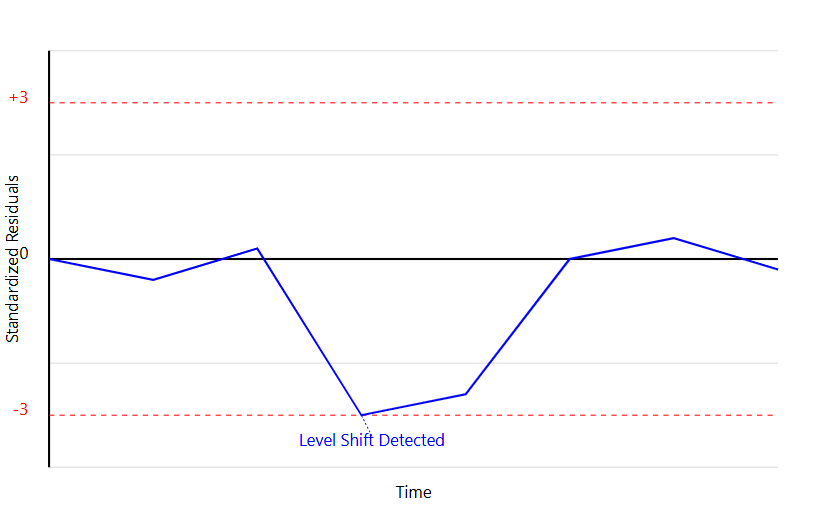

# Question 38:
Let Y = −1 + X + X2 + X3, with X ∼ N(0, 1). Compute the optimal linear prediction P[Y |X, X2].

## Computing the Optimal Linear Prediction P[Y|X,X²]

### Understanding the Problem

We have:
- A random variable $X \sim N(0,1)$
- A function $Y = -1 + X + X^2 + X^3$
- We want to find $P[Y|X,X^2]$ = $a + bX + cX^2$

### Key Insights

The optimal linear prediction has two important properties:
1. It's a linear combination of the available predictors (X and X²)
2. The prediction error must be orthogonal to both predictors

### Properties of Standard Normal Distribution

Since $X \sim N(0,1)$, we know:
- $E[X] = 0$
- $E[X^2] = 1$
- $E[X^3] = 0$
- $E[X^4] = 3$
- $E[X^5] = 0$
- $E[X^6] = 15$

### Setting Up the Orthogonality Conditions

The prediction error $(Y - (a + bX + cX^2))$ must be orthogonal to both X and X²:

1) $E[X(Y - (a + bX + cX^2))] = 0$
2) $E[X^2(Y - (a + bX + cX^2))] = 0$

We also know $E[Y] = E[-1 + X + X^2 + X^3] = -1 + 0 + 1 + 0 = 0$

### Expanding the First Condition

$E[X(-1 + X + X^2 + X^3 - a - bX - cX^2)] = 0$

$-E[X] + E[X^2] + E[X^3] + E[X^4] - aE[X] - bE[X^2] - cE[X^3] = 0$

$0 + 1 + 0 + 3 - 0 - b(1) - c(0) = 0$

$4 - b = 0$

Therefore: $b = 4$

### Expanding the Second Condition

$E[X^2(-1 + X + X^2 + X^3 - a - bX - cX^2)] = 0$

$-E[X^2] + E[X^3] + E[X^4] + E[X^5] - aE[X^2] - bE[X^3] - cE[X^4] = 0$

$-1 + 0 + 3 + 0 - a(1) - b(0) - c(3) = 0$

$2 - a - 3c = 0$

### Solving for Remaining Coefficients

From $E[Y] = E[a + bX + cX^2]$:
$0 = a + 0 + c$

Therefore: $a = -c$

Substituting into $2 - a - 3c = 0$:
$2 - (-c) - 3c = 0$
$2 + c - 3c = 0$
$2 - 2c = 0$
$c = 1$

And thus: $a = -1$

### Final Result

The optimal linear prediction is:

$P[Y|X,X^2] = -1 + 4X + X^2$

### Understanding the Result

This makes intuitive sense because:
1. The constant term (-1) matches the original function
2. The coefficient of X (4) is larger than in the original function because it's also trying to capture some of the X³ effect
3. The coefficient of X² (1) matches the original function

The only part we "lose" in our prediction is some of the X³ effect, which cannot be fully captured by linear combinations of X and X².

# Question 39:
Let Xt = 0.9Xt−1 + εt, with εt white noise, be an AR(1) process. Is it stationary? In the case of a positive answer, what are its mean and variance? What kind of ARIMA process is Yt = Yt−1 + Xt?

## Analysis of AR(1) Process and Its Integration

Let's explore this problem step by step, building our understanding as we go.

### Part 1: Stationarity of the AR(1) Process

We have the process $X_t = 0.9X_{t-1} + \varepsilon_t$. To check stationarity, we need to examine the characteristic equation:

$1 - 0.9z = 0$

This gives us $z = \frac{1}{0.9} \approx 1.11$

Since |z| > 1 (the root lies outside the unit circle), or equivalently |0.9| < 1 (the AR coefficient is less than 1 in absolute value), the process is indeed stationary.

### Part 2: Mean and Variance

For a stationary AR(1) process, we can find its moments:

**Mean calculation:**
Let $\mu = E[X_t]$. 

Then:
$E[X_t] = 0.9E[X_{t-1}] + E[\varepsilon_t]$

$\mu = 0.9\mu + 0$

$\mu(1 - 0.9) = 0$

Therefore: $\mu = 0$

**Variance calculation:**
Let $\gamma_0 = Var(X_t)$. Then:

$Var(X_t) = 0.9^2Var(X_{t-1}) + Var(\varepsilon_t)$

$\gamma_0 = 0.9^2\gamma_0 + \sigma^2$

$\gamma_0(1 - 0.9^2) = \sigma^2$

$\gamma_0 = \frac{\sigma^2}{1 - 0.81} = \frac{\sigma^2}{0.19}$

So if we denote the variance of the white noise as $\sigma^2$, the variance of $X_t$ is approximately $5.26\sigma^2$.

### Part 3: Identifying the ARIMA Process for $Y_t$

Now let's examine $Y_t = Y_{t-1} + X_t$

This equation tells us that $Y_t$ is formed by accumulating (summing) the values of our stationary AR(1) process $X_t$. Let's understand what this means:

1) First, note that we can write:
   $\Delta Y_t = Y_t - Y_{t-1} = X_t$

2) Therefore, $\Delta Y_t$ follows an AR(1) process:
   $\Delta Y_t = 0.9\Delta Y_{t-1} + \varepsilon_t$

3) This means $Y_t$ is an ARIMA(1,1,0) process because:
   - It needs one difference to become stationary (the I(1) part)
   - After differencing, it follows an AR(1) process
   - There is no MA component

In ARIMA notation, we write this as ARIMA(1,1,0) with AR coefficient φ = 0.9.

### Understanding the Implications

This is a fascinating case because:

1) While $X_t$ is stationary and mean-reverting (due to |0.9| < 1), $Y_t$ is not stationary because it accumulates these values.

2) Each shock $\varepsilon_t$ has a permanent effect on the level of $Y_t$, but its effect on changes in $Y_t$ (through $X_t$) gradually dies out.

3) The process $Y_t$ combines:
   - A non-stationary random walk component (from the integration)
   - A stationary AR(1) component (in its differences)

This type of model often appears in economics where variables might have both permanent and transitory components to their movements.

# Question 40:
Seasonal components in UCM.

## Understanding Seasonal Components in UCM

Seasonality in time series often reflects regular patterns that repeat over fixed intervals - monthly retail sales peak during holidays, energy consumption varies with seasons, tourism follows annual patterns. In Unobserved Components Models, we have two powerful approaches to capture these patterns while allowing them to evolve over time.

### The Dummy Variable Approach

This approach directly models seasonal effects using a set of seasonal indicators that sum to zero over the seasonal period.

For a seasonal period s (e.g., s=12 for monthly data), the seasonal component evolves as:

$$\gamma_t = -\sum_{i=1}^{s-1} \gamma_{t-i} + \omega_t$$

where $\omega_t$ is a white noise process with variance $\sigma_\omega^2$.

This can be written in state space form as:

$$\begin{bmatrix} 
\gamma_t \\
\gamma_{t-1} \\
\vdots \\
\gamma_{t-s+2}
\end{bmatrix} = 
\begin{bmatrix}
-1 & -1 & \cdots & -1 \\
1 & 0 & \cdots & 0 \\
\vdots & \ddots & \ddots & \vdots \\
0 & \cdots & 1 & 0
\end{bmatrix}
\begin{bmatrix}
\gamma_{t-1} \\
\gamma_{t-2} \\
\vdots \\
\gamma_{t-s+1}
\end{bmatrix} +
\begin{bmatrix}
\omega_t \\
0 \\
\vdots \\
0
\end{bmatrix}$$

Key features:
- Directly interpretable as seasonal effects
- Each season has its own specific effect
- Effects evolve gradually over time
- Maintains the zero-sum constraint across seasons

### The Trigonometric Approach

This approach represents seasonality as a sum of sine and cosine waves at seasonal frequencies. For period s, we use ⌊s/2⌋ harmonics:

$$\gamma_t = \sum_{j=1}^{\lfloor s/2 \rfloor} \gamma_t^{(j)}$$

where each harmonic component evolves as:

$$\begin{bmatrix}
\gamma_t^{(j)} \\
\gamma_t^{(j)*}
\end{bmatrix} =
\begin{bmatrix}
\cos(\lambda_j) & \sin(\lambda_j) \\
-\sin(\lambda_j) & \cos(\lambda_j)
\end{bmatrix}
\begin{bmatrix}
\gamma_{t-1}^{(j)} \\
\gamma_{t-1}^{(j)*}
\end{bmatrix} +
\begin{bmatrix}
\omega_t^{(j)} \\
\omega_t^{(j)*}
\end{bmatrix}$$

with $\lambda_j = 2\pi j/s$ being the frequency of the jth harmonic.

Key features:
- Smooth seasonal patterns
- Each harmonic captures different frequency components
- Can often represent seasonal patterns with fewer parameters
- Natural for patterns that resemble waves

### Comparing the Approaches

1. **Flexibility vs. Smoothness:**
   - Dummy variables: More flexible, can capture sharp changes
   - Trigonometric: Produces smoother patterns, better for gradual transitions

2. **Interpretation:**
   - Dummy variables: Direct interpretation of seasonal effects
   - Trigonometric: Effects interpreted through frequency components

3. **Parameter Count:**
   - Dummy variables: s-1 states needed
   - Trigonometric: 2⌊s/2⌋ states needed (often fewer than dummy approach)

4. **Computational Aspects:**
   - Dummy variables: Simpler computations
   - Trigonometric: More complex but potentially more efficient for high frequencies

### Practical Considerations

When choosing between approaches, consider:

1. **Data Characteristics:**
   - Sharp seasonal patterns → Dummy variables
   - Smooth seasonal variations → Trigonometric

2. **Series Length:**
   - Short series → Simpler dummy variable approach
   - Long series → Either approach works well

3. **Seasonal Period:**
   - Low frequency (e.g., quarterly) → Either approach
   - High frequency (e.g., daily) → Trigonometric often more efficient

4. **Analysis Goals:**
   - Direct interpretation needed → Dummy variables
   - Smooth forecasts preferred → Trigonometric

The beauty of UCM is that either seasonal component can be combined with trend and cycle components to create a complete model of the time series, allowing for rich and flexible representations of real-world phenomena.

# Question 41:
 Write in state space form the time-varying regression model yt = µt + βtxt + εt, where εt is a white noise and µt and βt are both random walks.

## Time-Varying Regression in State Space Form

Let's develop the state space representation for this time-varying regression model. Our starting point is:

$$y_t = \mu_t + \beta_tx_t + \varepsilon_t$$

where both parameters follow random walks:

$$\mu_t = \mu_{t-1} + \eta_t$$
$$\beta_t = \beta_{t-1} + \zeta_t$$

### The State Space Representation

The state vector will contain both time-varying parameters:

$$\alpha_t = \begin{pmatrix} \mu_t \\ \beta_t \end{pmatrix}$$

Now we can construct our state space model:

### Measurement Equation

The measurement equation connects our observation yt to the state vector:

$$y_t = \begin{pmatrix} 1 & x_t \end{pmatrix} \begin{pmatrix} \mu_t \\ \beta_t \end{pmatrix} + \varepsilon_t$$

Therefore:

$$Z_t = \begin{pmatrix} 1 & x_t \end{pmatrix}$$

Note that Zt varies with time because it contains the observed regressor xt.

### Transition Equation

The transition equation describes how our state vector evolves:

$$\begin{pmatrix} \mu_t \\ \beta_t \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \begin{pmatrix} \mu_{t-1} \\ \beta_{t-1} \end{pmatrix} + \begin{pmatrix} \eta_t \\ \zeta_t \end{pmatrix}$$

Therefore:

$$T = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$$

### Disturbance Variances

For the measurement equation:
$$H_t = Var(\varepsilon_t) = \sigma_\varepsilon^2$$

For the transition equation:
$$Q_t = Var\begin{pmatrix} \eta_t \\ \zeta_t \end{pmatrix} = \begin{pmatrix} \sigma_\eta^2 & 0 \\ 0 & \sigma_\zeta^2 \end{pmatrix}$$

### Complete State Space Form

Measurement equation:
$$y_t = Z_t\alpha_t + \varepsilon_t$$

Transition equation:
$$\alpha_t = T\alpha_t + \eta_t$$

Where:
- $Z_t = \begin{pmatrix} 1 & x_t \end{pmatrix}$ varies with time
- $T = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$ is constant
- $H_t = \sigma_\varepsilon^2$ is constant
- $Q_t = \begin{pmatrix} \sigma_\eta^2 & 0 \\ 0 & \sigma_\zeta^2 \end{pmatrix}$ is constant

### Interpretation

This state space form captures several important features:

The measurement matrix Zt changes over time with xt, allowing the impact of βt to vary with the level of the regressor. This makes the model quite flexible - it can capture both evolving baseline levels (through μt) and evolving relationships between y and x (through βt).

The transition matrix T being identity reflects that both parameters follow random walks - their best prediction for the next period is simply their current value. The diagonal structure indicates that the parameters evolve independently.

The Q matrix allows for different variances in the evolution of μt and βt. This means we can have parameters that evolve at different speeds - for instance, a slowly changing intercept with a more volatile slope coefficient.

This formulation allows us to track how both the baseline level and the relationship between y and x evolve over time, making it particularly useful for analyzing changing economic relationships or varying policy effects.

# Question 42:
How would you identify additive outliers in a time series modeled with UCM?

## Identifying Additive Outliers in UCM

Identifying additive outliers in an Unobserved Components Model requires a systematic approach using auxiliary residuals and careful statistical analysis. Let's understand this process in detail.

### Understanding Auxiliary Residuals

In a UCM framework, we can identify outliers through standardized auxiliary residuals, particularly the irregular (observation equation) residuals. These residuals are calculated after running both the Kalman filter and smoother on our data.

The irregular auxiliary residuals are given by:

$$r_{\varepsilon,t} = \frac{\hat{\varepsilon}_t}{\sqrt{\text{Var}(\hat{\varepsilon}_t)}}$$

where $\hat{\varepsilon}_t$ is the smoothed estimate of the irregular component, and $\text{Var}(\hat{\varepsilon}_t)$ is its variance.

### Detection Process

The process for identifying additive outliers involves several steps:

First, we estimate our UCM model using maximum likelihood. For a basic structural model, this might be:

$$y_t = \mu_t + \gamma_t + \varepsilon_t$$

where $\mu_t$ is the trend component, $\gamma_t$ is the seasonal component (if present), and $\varepsilon_t$ is the irregular component.

Next, we compute the standardized auxiliary residuals using the Kalman smoother. These residuals, under normal conditions, should follow approximately a standard normal distribution.

We can then identify potential outliers by looking for residuals that exceed certain critical values. Typically, we consider observations as potential outliers when:

$$|r_{\varepsilon,t}| > 3$$

This threshold corresponds to approximately 99.7% probability in a standard normal distribution.

### Distinguishing Characteristics

Additive outliers have specific characteristics in the auxiliary residuals:

The irregular residual will show a large spike at the outlier position. Unlike level shifts or slope changes, this spike will be isolated - neighboring residuals should not show systematic patterns.

The residual pattern for an additive outlier typically shows:
- A large value at time t
- No significant values before or after
- No persistent effects in other components (level or slope)

### Intervention Analysis

Once outliers are identified, we can incorporate them into our model through intervention variables:

$$y_t = \mu_t + \gamma_t + \delta I_t^{(\tau)} + \varepsilon_t$$

where $I_t^{(\tau)}$ is an impulse indicator:

$$I_t^{(\tau)} = \begin{cases} 
1 & \text{for } t = \tau \\
0 & \text{otherwise}
\end{cases}$$

### Practical Implementation

In practice, we should:

Consider the context of our data. What might cause outliers in this particular series? For instance, economic data might show outliers during financial crises or policy changes.

Examine the auxiliary residuals visually through plots, looking for clear spikes that exceed our threshold.

Calculate the test statistics systematically for all observations, identifying any that exceed our critical values.

Cross-validate our findings with any known events or external information that might explain the outliers.

### Model Refinement

After identifying outliers, we should:

Estimate our model with intervention variables for the identified outliers. This helps us understand the "clean" underlying signal.

Check if removing the effect of outliers changes our interpretation of the underlying components or our forecasts.

Verify that our intervention model has adequately captured the outliers by examining the new auxiliary residuals.

### Important Considerations

Remember that outlier detection should always be done thoughtfully:

Statistical significance alone isn't enough - we should consider the practical significance of the deviations.

Multiple testing issues arise when checking many observations - we might want to adjust our critical values accordingly.

The context of our data and subject matter expertise should guide our interpretation of potential outliers.

# Extra

# The Kalman Filter: A Theoretical Foundation for Time Series Analysis

The Kalman Filter serves as a fundamental tool in time series analysis, allowing us to estimate unobserved components (states) of a system using noisy measurements. Let me guide you through understanding this powerful estimation technique using the state space framework.

## State Space Representation

In time series analysis, we work with two primary equations that define our system:

1. The Observation (or Measurement) Equation:
$$
\underbrace{y_t}_{\text{observation}} = \underbrace{Z_t}_{\text{observation matrix}} \underbrace{\alpha_t}_{\text{state vector}} + \underbrace{d_t}_{\text{known input}} + \underbrace{\varepsilon_t}_{\text{observation noise}}
$$
where $\varepsilon_t \sim N(0, H_t)$

2. The State (or Transition) Equation:
$$
\underbrace{\alpha_t}_{\text{current state}} = \underbrace{T_t}_{\text{transition matrix}} \underbrace{\alpha_{t-1}}_{\text{previous state}} + \underbrace{c_t}_{\text{known input}} + \underbrace{R_t\eta_t}_{\text{state noise}}
$$
where $\eta_t \sim N(0, Q_t)$

The matrices $Z_t$, $T_t$, and $R_t$ might be time-varying or constant, depending on the specific model. The vectors $d_t$ and $c_t$ represent known inputs or deterministic components.

## The Kalman Filter Algorithm

The Kalman Filter operates recursively through two main steps:

### 1. Prediction Step

First, we predict the state vector and its covariance matrix:

State Prediction:
$$
\underbrace{a_{t|t-1}}_{\text{predicted state}} = \underbrace{T_t}_{\text{transition matrix}} \underbrace{a_{t-1}}_{\text{previous estimate}} + \underbrace{c_t}_{\text{known input}}
$$

Covariance Prediction:
$$
\underbrace{P_{t|t-1}}_{\text{predicted covariance}} = \underbrace{T_t}_{\text{transition matrix}} \underbrace{P_{t-1}}_{\text{previous covariance}} \underbrace{T_t'}_{\text{transpose}} + \underbrace{R_tQ_tR_t'}_{\text{state noise covariance}}
$$

### 2. Update Step

When new data arrives, we update our predictions:

Innovation (Prediction Error):
$$
\underbrace{v_t}_{\text{innovation}} = \underbrace{y_t}_{\text{observation}} - \underbrace{Z_ta_{t|t-1}}_{\text{predicted observation}} - \underbrace{d_t}_{\text{known input}}
$$

Innovation Variance:
$$
\underbrace{F_t}_{\text{innovation variance}} = \underbrace{Z_t}_{\text{observation matrix}} \underbrace{P_{t|t-1}}_{\text{predicted covariance}} \underbrace{Z_t'}_{\text{transpose}} + \underbrace{H_t}_{\text{observation noise variance}}
$$

Kalman Gain:
$$
\underbrace{K_t}_{\text{Kalman gain}} = \underbrace{P_{t|t-1}}_{\text{predicted covariance}} \underbrace{Z_t'}_{\text{transpose}} \underbrace{F_t^{-1}}_{\text{inverse innovation variance}}
$$

State Update:
$$
\underbrace{a_t}_{\text{updated state}} = \underbrace{a_{t|t-1}}_{\text{predicted state}} + \underbrace{K_t}_{\text{Kalman gain}} \underbrace{v_t}_{\text{innovation}}
$$

Covariance Update:
$$
\underbrace{P_t}_{\text{updated covariance}} = \underbrace{P_{t|t-1}}_{\text{predicted covariance}} - \underbrace{K_tF_tK_t'}_{\text{correction term}}
$$

## Understanding the Filter's Logic

The Kalman Filter achieves optimality through its careful balancing of predictions and observations. The Kalman gain $K_t$ plays a crucial role in this balance:

1. When observation noise ($H_t$) is small relative to state uncertainty ($P_{t|t-1}$), the gain gives more weight to the new observation
2. When observation noise is large, the gain gives more weight to our prediction

The filter's operation can be understood as a Bayesian updating process:
- The prediction step represents our prior belief
- The observation provides new evidence
- The update step combines these to form our posterior belief

## Initialization

The filter requires initial values:
$$
a_0 \text{ and } P_0
$$

For stationary components, we can use the unconditional mean and variance. For non-stationary components, we often use diffuse initialization (very large initial variance).

## Why the Filter is Optimal

The Kalman Filter provides optimal estimates under three conditions:
1. The system is linear (as shown in our state space equations)
2. All noise terms are Gaussian
3. The covariance matrices ($H_t$, $Q_t$) are known

Under these conditions, the filter minimizes the mean squared error of our state estimates and provides the exact conditional distribution of the state given all past observations:
$$
\alpha_t|Y_t \sim N(a_t, P_t)
$$
where $Y_t$ represents all observations up to time $t$.

# Understanding the Kalman Filter Update Step

Let's break down each equation of the Update Step and understand how they work together to refine our state estimates. Think of the Update Step as a careful weighing of new information against our previous beliefs.

## 1. The Innovation Equation

$$
\underbrace{v_t}_{\text{innovation}} = \underbrace{y_t}_{\text{observation}} - \underbrace{Z_ta_{t|t-1}}_{\text{predicted observation}} - \underbrace{d_t}_{\text{known input}}
$$

This equation calculates how "surprised" we are by the new measurement. Let's break it down:

- $y_t$ is what we actually observe
- $Z_ta_{t|t-1}$ is what we expected to observe based on our prediction
- $d_t$ accounts for any known external influences
- $v_t$ is the difference between reality and expectation

Think of it like checking your bank account: if you predicted you'd have $100 ($Z_ta_{t|t-1}$), but you actually have $90 ($y_t$), your innovation ($v_t$) is -$10. This tells you something unexpected happened.

## 2. The Innovation Variance

$$
\underbrace{F_t}_{\text{innovation variance}} = \underbrace{Z_t}_{\text{observation matrix}} \underbrace{P_{t|t-1}}_{\text{predicted covariance}} \underbrace{Z_t'}_{\text{transpose}} + \underbrace{H_t}_{\text{observation noise variance}}
$$

This equation tells us how much uncertainty there is in our innovation. It combines two sources of uncertainty:

1. $Z_tP_{t|t-1}Z_t'$: How uncertain we are about our prediction
2. $H_t$: How noisy our measurements are

Continuing our bank account analogy: if you're very uncertain about your prediction ($P_{t|t-1}$ is large) and your bank's reporting system sometimes has errors ($H_t$ is large), then $F_t$ will be large, indicating you shouldn't be too alarmed by discrepancies.

## 3. The Kalman Gain

$$
\underbrace{K_t}_{\text{Kalman gain}} = \underbrace{P_{t|t-1}}_{\text{predicted covariance}} \underbrace{Z_t'}_{\text{transpose}} \underbrace{F_t^{-1}}_{\text{inverse innovation variance}}
$$

The Kalman gain is perhaps the most crucial equation - it determines how much we should trust our new measurement versus our prediction. It's like a smart weighing scale that considers:

- How uncertain we are about our prediction ($P_{t|t-1}$)
- How uncertain we are about our measurement ($F_t^{-1}$ includes $H_t$)

Properties of the Kalman gain:
- If measurement noise ($H_t$) is small, $K_t$ will be larger, giving more weight to new measurements
- If prediction uncertainty ($P_{t|t-1}$) is small, $K_t$ will be smaller, giving more weight to our predictions

## 4. The State Update

$$
\underbrace{a_t}_{\text{updated state}} = \underbrace{a_{t|t-1}}_{\text{predicted state}} + \underbrace{K_t}_{\text{Kalman gain}} \underbrace{v_t}_{\text{innovation}}
$$

This is where everything comes together. We take our prediction and correct it based on the new information. The correction is:
- Proportional to how wrong we were ($v_t$)
- Scaled by how much we trust the new information ($K_t$)

In our bank account example: if we predicted $100, saw $90, and our Kalman gain is 0.7, our new estimate would be:
$100 + 0.7 \times (-10) = 93$

## 5. The Covariance Update

$$
\underbrace{P_t}_{\text{updated covariance}} = \underbrace{P_{t|t-1}}_{\text{predicted covariance}} - \underbrace{K_tF_tK_t'}_{\text{correction term}}
$$

This final equation updates our uncertainty about the state. Notice that it always decreases our uncertainty (we subtract the correction term). This makes sense because:
- New information, even if noisy, should make us more certain
- The more we trust the measurement (larger $K_t$), the more our uncertainty decreases

## How They Work Together

The five equations form a coherent sequence:
1. Calculate how wrong our prediction was ($v_t$)
2. Determine how much we trust this error ($F_t$)
3. Compute the optimal way to incorporate new information ($K_t$)
4. Update our state estimate ($a_t$)
5. Update our uncertainty about the state ($P_t$)

This sequence ensures that each new observation improves our estimate in a statistically optimal way, carefully balancing our prior knowledge with new information.

# Matrix Operations, Initialization, and Smoothing in Kalman Filters

## Understanding Matrix Multiplication with Transposes

When we see expressions like $Z_tP_{t|t-1}Z_t'$ in the Innovation Variance equation:
$$
F_t = Z_tP_{t|t-1}Z_t' + H_t
$$
we're dealing with a fundamental concept in covariance propagation. Let's understand why this happens.

### Why We Multiply by Transposes

The reason lies in how we transform variance-covariance matrices. When we multiply a random variable by a matrix, its covariance matrix transforms in a specific way. Consider a simple example:

If we have a random vector $x$ with covariance matrix $P$, and we transform it by matrix $A$ to get $y = Ax$, then the covariance of $y$ is:
$$
\text{Cov}(y) = APA'
$$

This $APA'$ pattern appears throughout the Kalman Filter because we're constantly transforming random variables and need to keep track of their uncertainties. Let's see what this means in practice:

1. In the Innovation Variance equation:
   - $P_{t|t-1}$ is our uncertainty about the state
   - $Z_t$ transforms the state into measurement space
   - $Z_tP_{t|t-1}Z_t'$ gives us the uncertainty of our prediction in measurement space

2. The multiplication by transpose ensures:
   - The resulting matrix has the correct dimensions
   - The covariance matrix remains symmetric (as all covariance matrices must be)
   - The variances (diagonal elements) remain positive

## Initialization: Starting the Filter Right

Initialization is crucial because it provides the starting point for our recursive estimations. We need to set:
1. Initial state estimate ($a_0$)
2. Initial covariance matrix ($P_0$)

### Good Values for Initialization

For the initial state $a_0$:
1. For stationary components:
   - Use the unconditional mean of the process
   - For example, for a mean-reverting process, use its long-term mean

2. For non-stationary components:
   - Use the first few observations to make an educated guess
   - For a trend, you might use the first observation as level and first difference as slope

For the initial covariance matrix $P_0$:

1. For stationary components:
   - Use the unconditional variance of the process
   - For AR(1) process with parameter $\phi$ and innovation variance $\sigma^2$, use $\sigma^2/(1-\phi^2)$

2. For non-stationary components:
   - Use a "diffuse" or large variance (e.g., $10^6$ or $10^7$)
   - This indicates high uncertainty about initial values
   - The filter will quickly converge to reasonable values

Example initialization for a local level model:
```
P_0 = [
    1e6    0    # Level uncertainty (diffuse)
    0    1e2    # Slope uncertainty (moderately certain)
]
```

## Smoothing: Looking Back for Better Estimates

Smoothing is indeed a crucial concept in Kalman Filtering. While the regular Kalman Filter gives us estimates based on data up to time t (filtering), smoothing uses the entire dataset to improve our estimates.

### Types of Smoothing

1. Fixed-Interval Smoothing:
   - Uses all data from t=1 to T
   - Gives estimates $a_{t|T}$ for all t
   - Most common in time series analysis
   
2. Fixed-Point Smoothing:
   - Updates estimate of state at fixed time k as new data arrives
   - Gives series of estimates $a_{k|t}$ for t > k

### The Smoothing Equations

The smoothing recursions run backwards from T to 1:

$$
\underbrace{a_{t|T}}_{\text{smoothed state}} = \underbrace{a_t}_{\text{filtered state}} + \underbrace{P_t}_{\text{filtered covariance}} \underbrace{T_t'}_{\text{transition}} \underbrace{P_{t+1|t}^{-1}}_{\text{inverse prediction}} (\underbrace{a_{t+1|T}}_{\text{next smooth}} - \underbrace{T_ta_t}_{\text{prediction}})
$$

This gives us better estimates because:
- We use future information not available during filtering
- The estimates are typically smoother (less jagged)
- The uncertainty of smoothed estimates is smaller than filtered estimates

### Practical Implications

In time series analysis:
- Use filtered estimates for real-time applications
- Use smoothed estimates for historical analysis
- Smoothed estimates are especially useful for:
  - Trend estimation
  - Seasonal adjustment
  - Cycle extraction

The improvement from smoothing is most noticeable when:
- The signal-to-noise ratio is low
- There are missing observations
- The state dynamics are strongly persistent

# The Kalman Filter: A Detailed Mathematical Explanation

The Kalman Filter is a recursive algorithm that consists of two main phases: prediction and update. Let's examine each equation in detail.

### State-Space Model
First, recall that our system is described by:

Measurement equation:
$$y_t = \underbrace{Z_t\alpha_t}_{\text{state contribution}} + \underbrace{d_t}_{\text{deterministic term}} + \underbrace{\epsilon_t}_{\text{measurement noise}}$$

State equation:
$$\alpha_t = \underbrace{T_t\alpha_{t-1}}_{\text{state evolution}} + \underbrace{c_t}_{\text{deterministic term}} + \underbrace{R_t\eta_t}_{\text{state noise}}$$

### Prediction Phase (Time Update)

1. State Prediction:
$$a_{t|t-1} = \underbrace{T_t a_{t-1}}_{\text{predicted state}} + \underbrace{c_t}_{\text{deterministic input}}$$

2. Prediction Error Covariance:
$$P_{t|t-1} = \underbrace{T_t P_{t-1} T_t'}_{\text{propagated covariance}} + \underbrace{R_t Q_t R_t'}_{\text{added noise covariance}}$$

### Measurement Update Phase

1. Innovation Calculation:
$$v_t = \underbrace{y_t}_{\text{observation}} - \underbrace{(Z_t a_{t|t-1} + d_t)}_{\text{predicted measurement}}$$

2. Innovation Covariance:
$$F_t = \underbrace{Z_t P_{t|t-1} Z_t'}_{\text{predicted state uncertainty}} + \underbrace{H_t}_{\text{measurement noise}}$$

3. Kalman Gain Matrix:
$$K_t = \underbrace{P_{t|t-1} Z_t' F_t^{-1}}_{\text{optimal weight matrix}}$$

4. State Update:
$$a_t = \underbrace{a_{t|t-1}}_{\text{prediction}} + \underbrace{K_t v_t}_{\text{weighted correction}}$$

5. Covariance Update:
$$P_t = \underbrace{P_{t|t-1}}_{\text{predicted covariance}} - \underbrace{K_t Z_t P_{t|t-1}}_{\text{uncertainty reduction}}$$

### Filter Properties

The Kalman gain $K_t$ plays a crucial role by optimally weighting the new information contained in the innovation $v_t$. When:

- $K_t \approx 0$: The filter trusts the predictions more than the measurements
- $K_t \approx 1$: The filter trusts the measurements more than the predictions

The recursion requires initial values:
- $a_0$: Initial state estimate
- $P_0$: Initial state uncertainty

For stationary components, these can be derived from the unconditional distribution:
$$\begin{align*}
a_0 &= (I - T)^{-1}c \\
\text{vec}(P_0) &= (I - T \otimes T)^{-1}\text{vec}(RQR')
\end{align*}$$

For non-stationary components, diffuse initialization is often used, setting the relevant elements of $P_0$ to very large values.